# Partie 1 : analyse des données

In [2]:
import numpy as np
import pandas as pd
from random import randint

import matplotlib.pyplot as plt

from swarm_sim import *

from IPython.display import display

%matplotlib inline 

## Transformation des données en graphe

Import du CSV et mise en forme des données  
Chaque satellite a ses coordonnées sur 3 lignes (coordonnées x, y et z) et chaque colonne indique son déplacement dans le temps

In [3]:
PATH = 'Traces.csv'

df = pd.read_csv(PATH, sep=',', header=None)
satellites = {}

for i in range(0,100):
    sat = df.iloc[3*i : 3*i+3].copy()
    sat['coords'] = ['x','y','z']
    satellites[i] = sat.set_index('coords', drop=True)

#affichage du premier satellite
satellites[0]


0             1             2             3             4     \
coords                                                                         
x      -4.850747e+05 -4.937755e+05 -5.024536e+05 -5.111086e+05 -5.197401e+05   
y      -7.066530e+05 -7.201117e+05 -7.335372e+05 -7.469290e+05 -7.602864e+05   
z      -2.026363e+06 -2.019625e+06 -2.012795e+06 -2.005871e+06 -1.998855e+06   

                5             6             7             8             9     \
coords                                                                         
x      -5.283476e+05 -5.369309e+05 -5.454894e+05 -5.540229e+05 -5.625310e+05   
y      -7.736088e+05 -7.868957e+05 -8.001464e+05 -8.133603e+05 -8.265368e+05   
z      -1.991747e+06 -1.984548e+06 -1.977257e+06 -1.969876e+06 -1.962403e+06   

        ...          9990          9991          9992          9993  \
coords  ...                                                           
x       ...  1.490967e+06  1.494274e+06  1.497573e+06  1.500865e+06   
y       ...  2.218138e+06  2.223313e+06  2.228477e+06  2.233629e+06   
z       ...  3.692429e+06  3.686602e+06  3.680756e+06  3.674890e+06   

                9994          9995          9996          9997          9998  \
coords                                                                         
x       1.504149e+06  1.507425e+06  1.510693e+06  1.513954e+06  1.517206e+06   
y       2.238769e+06  2.243898e+06  2.249015e+06  2.254120e+06  2.259214e+06   
z       3.669006e+06  3.663103e+06  3.657180e+06  3.651239e+06  3.645278e+06   

                9999  
coords                
x       1.520451e+06  
y       2.264296e+06  
z       3.639299e+06  

[3 rows x 10000 columns]

Création des graphes en fonction de l'état initial des satellites  
On ajoute un lien entre deux noeuds en fonction de leur distance (trois distances : 20km, 40km, 60km)

In [4]:
RANGE1 = 20000
RANGE2 = 40000
RANGE3 = 60000

list_satellites = []

for i in range(len(satellites)):
    obj_sat = Node.__new__(Node)
    obj_sat.__init__(i, satellites[i][0][0], satellites[i][0][1], satellites[i][0][2])
    list_satellites.append(obj_sat)

swarm = Swarm.__new__(Swarm)
swarm.__init__(RANGE1, list_satellites)
graph1 = swarm.swarm_to_nxgraph()

swarm.__init__(RANGE2, list_satellites)
graph2 = swarm.swarm_to_nxgraph()

swarm.__init__(RANGE3, list_satellites)
graph3 = swarm.swarm_to_nxgraph()


/tmp/ipykernel_189657/3195517332.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obj_sat.__init__(i, satellites[i][0][0], satellites[i][0][1], satellites[i][0][2])


## Affichage des graphes obtenus à l'état initial

In [9]:
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
def afficher_graphe(graph):
    fig, ax = plt.subplots(figsize=(15, 9))
    ax.axis("off")
    nx.draw_networkx(graph, pos=nx.random_layout(graph1), ax=ax, **plot_options)

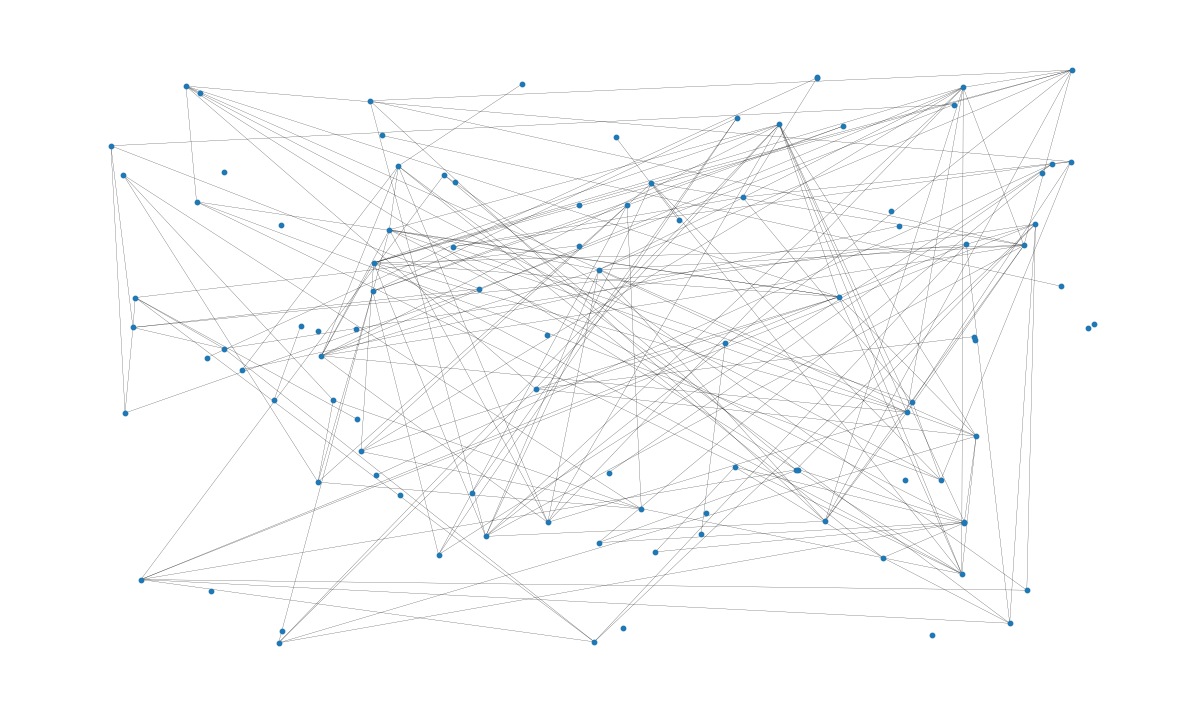

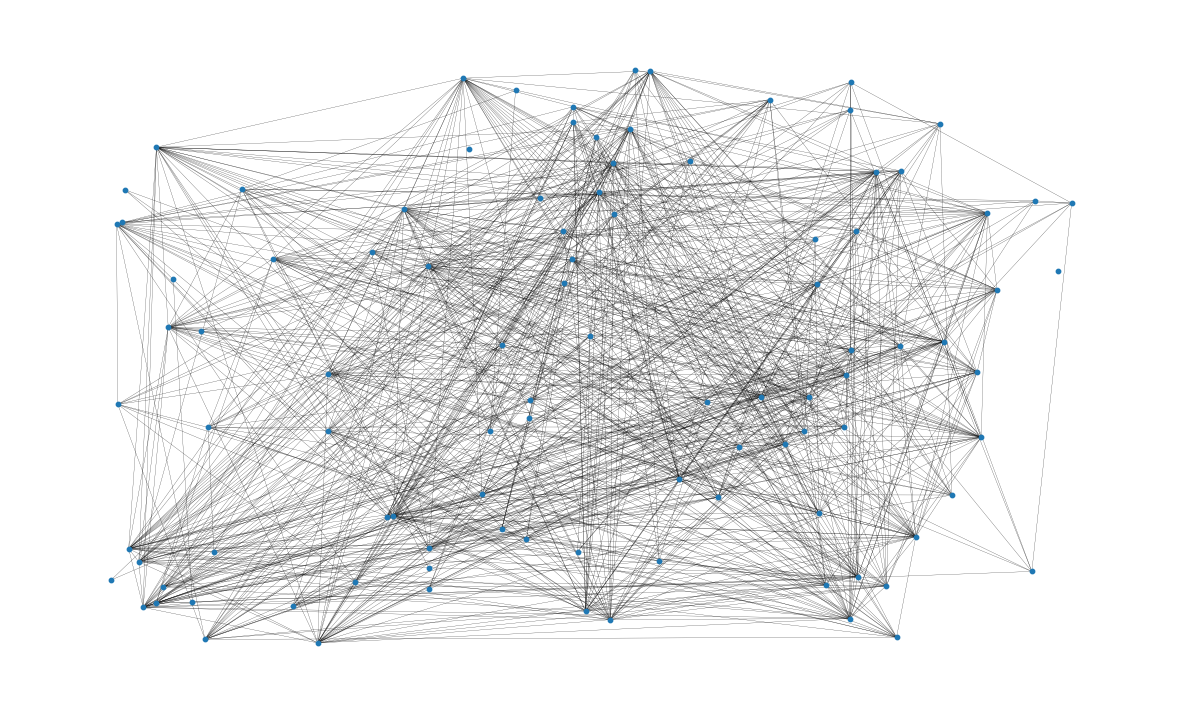

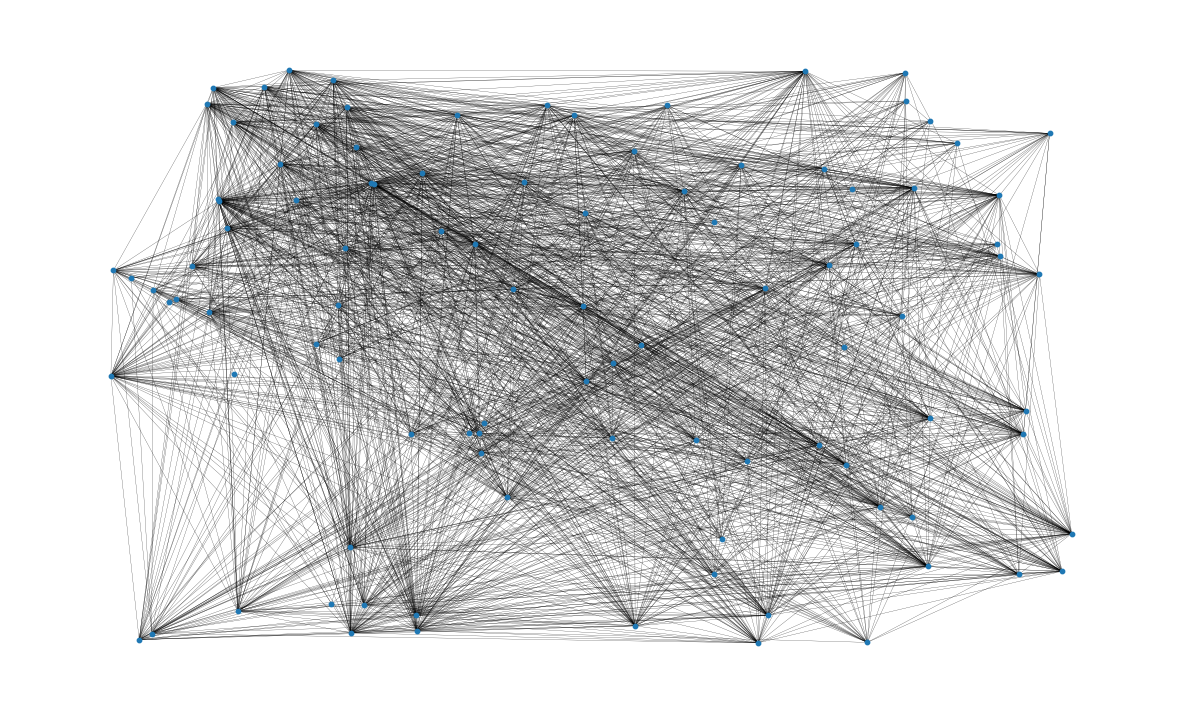

In [10]:
afficher_graphe(graph1) #arc si distance < 20km
afficher_graphe(graph2) #arc si distance < 40km
afficher_graphe(graph3) #arc si distance < 60km

Ici, on a affiché les noeuds du graphe selon une position aléatoire. On remarque bien que plus on allège la contrainte de distance (passage de 20km à 60km), plus le graphe devient fortement connecté, jusqu'à devenir connexe.  
    
On va maintenant afficher le graphe en utilisant un "spring_layout", qui positionne chaque noeud en fonction des autres et des arcs les reliant.

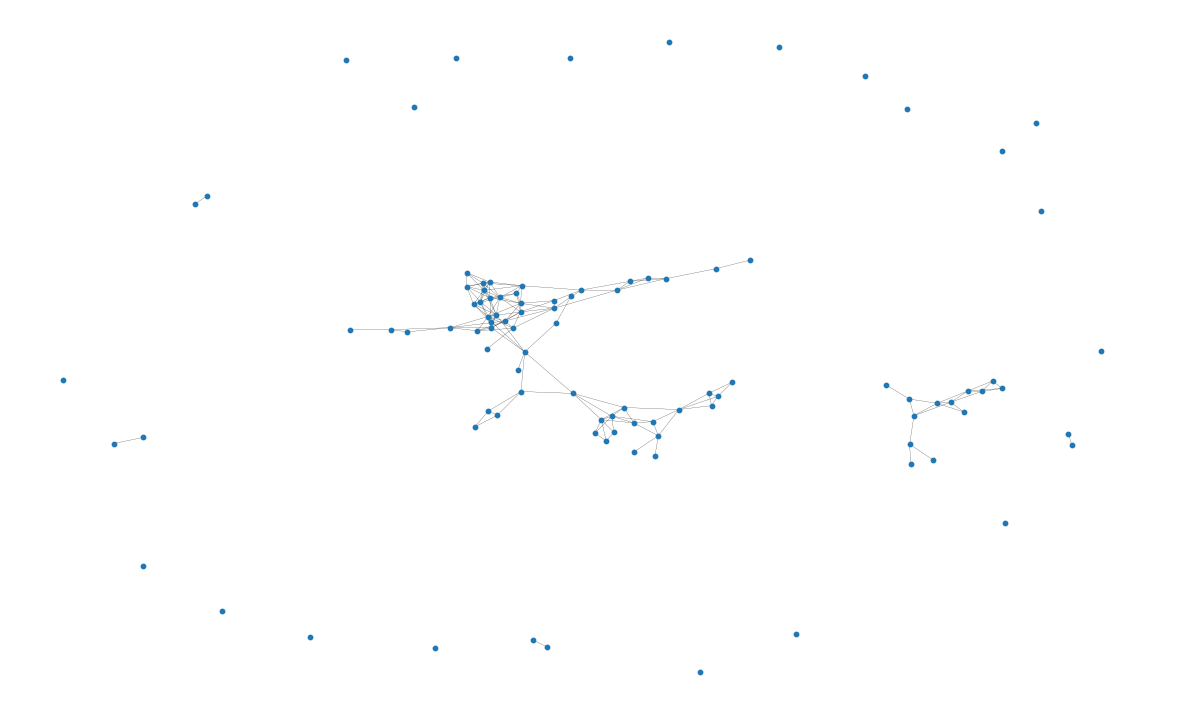

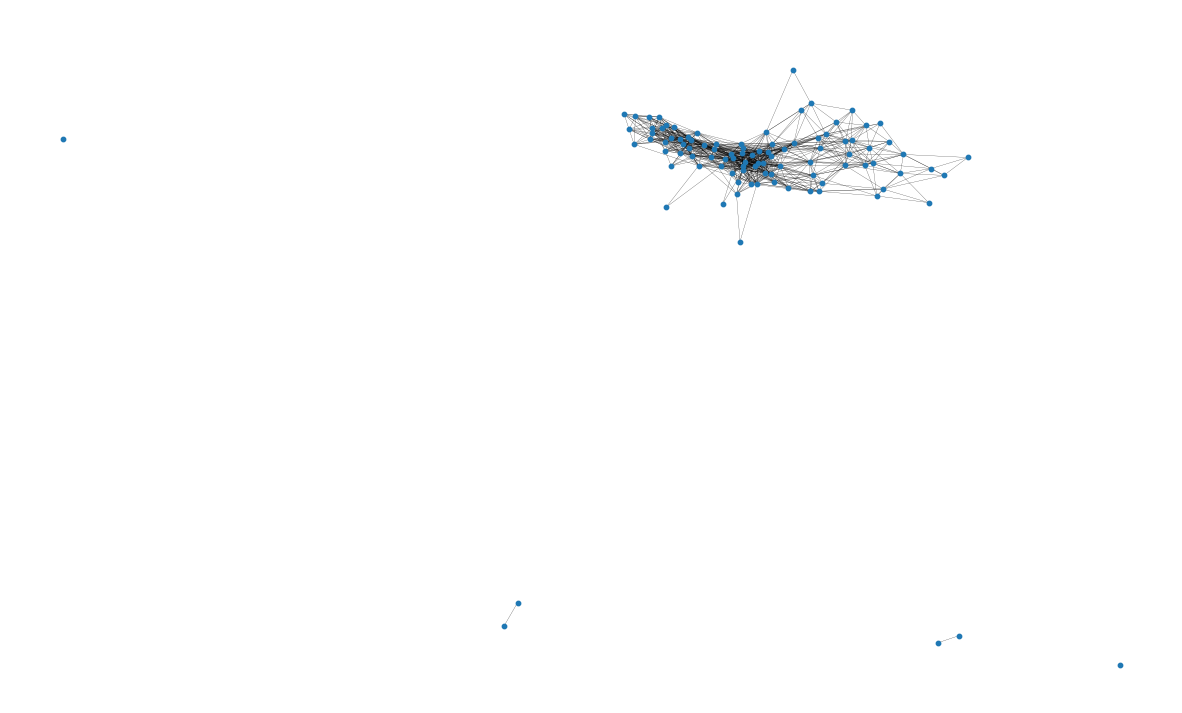

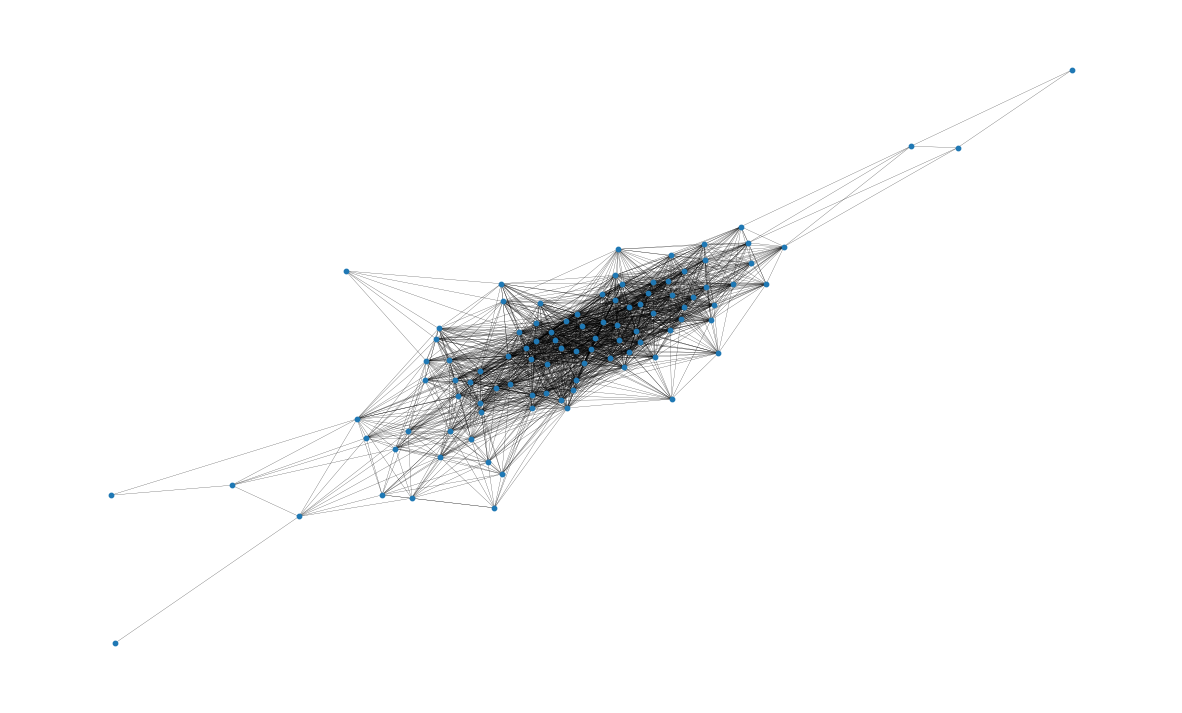

In [11]:
def afficher_graphe_avec_layout(graph):
    pos = nx.spring_layout(graph)
    fig, ax = plt.subplots(figsize=(15, 9))
    ax.axis("off")
    nx.draw_networkx(graph, pos=pos, ax=ax, **plot_options)

afficher_graphe_avec_layout(graph1) #arc si distance < 20km
afficher_graphe_avec_layout(graph2) #arc si distance < 40km
afficher_graphe_avec_layout(graph3) #arc si distance < 60km

## Analyse des graphes à l'état initial

Graphe 1 (20km)

In [12]:
print("Nombre d'arcs ", graph1.number_of_edges())
print("Nombre de noeuds ", graph1.number_of_nodes())
print("Degré moyen des noeuds ", np.mean([d for _, d in graph1.degree()]))
print("Nombre de sous-graphes connectés : ", nx.number_connected_components(graph1))

Nombre d'arcs  174
Nombre de noeuds  100
Degré moyen des noeuds  3.48
Nombre de sous-graphes connectés :  26


Graphe 2 (40km)

In [13]:
print("Nombre d'arcs ", graph2.number_of_edges())
print("Nombre de noeuds ", graph2.number_of_nodes())
print("Degré moyen des noeuds ", np.mean([d for _, d in graph2.degree()]))
print("Nombre de sous-graphes connectés : ", nx.number_connected_components(graph2))

Nombre d'arcs  883
Nombre de noeuds  100
Degré moyen des noeuds  17.66
Nombre de sous-graphes connectés :  5


Graphe 3 (60km)

In [14]:
print("Nombre d'arcs ", graph3.number_of_edges())
print("Nombre de noeuds ", graph3.number_of_nodes())
print("Degré moyen des noeuds ", np.mean([d for _, d in graph3.degree()]))
print("Nombre de sous-graphes connectés : ", nx.number_connected_components(graph3))

Nombre d'arcs  1958
Nombre de noeuds  100
Degré moyen des noeuds  39.16
Nombre de sous-graphes connectés :  1


In [15]:
def afficher_shortest_paths(graph):
    shortest_paths = dict(nx.all_pairs_shortest_path_length(graph))
    df = pd.DataFrame(shortest_paths).fillna("∞") 
    display(df)

afficher_shortest_paths(graph1) #arc si distance < 20km
afficher_shortest_paths(graph2) #arc si distance < 40km
afficher_shortest_paths(graph3) #arc si distance < 60km

0    1  2  3  4    5    6    7    8    9   ...   90 91 92   93   94   95  \
0   0.0  5.0  ∞  ∞  ∞  4.0  4.0  3.0  6.0  3.0  ...  3.0  ∞  ∞    ∞  4.0  1.0   
19  1.0  4.0  ∞  ∞  ∞  3.0  3.0  2.0  5.0  2.0  ...  2.0  ∞  ∞    ∞  3.0  1.0   
95  1.0  5.0  ∞  ∞  ∞  4.0  4.0  3.0  6.0  3.0  ...  3.0  ∞  ∞    ∞  4.0  0.0   
70  2.0  3.0  ∞  ∞  ∞  2.0  2.0  2.0  4.0  1.0  ...  1.0  ∞  ∞    ∞  3.0  2.0   
73  2.0  4.0  ∞  ∞  ∞  3.0  3.0  1.0  5.0  1.0  ...  2.0  ∞  ∞    ∞  2.0  2.0   
..  ...  ... .. .. ..  ...  ...  ...  ...  ...  ...  ... .. ..  ...  ...  ...   
85    ∞    ∞  ∞  ∞  ∞    ∞    ∞    ∞    ∞    ∞  ...    ∞  ∞  ∞    ∞    ∞    ∞   
86    ∞    ∞  ∞  ∞  ∞    ∞    ∞    ∞    ∞    ∞  ...    ∞  ∞  ∞    ∞    ∞    ∞   
88    ∞    ∞  ∞  ∞  ∞    ∞    ∞    ∞    ∞    ∞  ...    ∞  ∞  ∞    ∞    ∞    ∞   
93    ∞    ∞  ∞  ∞  ∞    ∞    ∞    ∞    ∞    ∞  ...    ∞  ∞  ∞  0.0    ∞    ∞   
98    ∞    ∞  ∞  ∞  ∞    ∞    ∞    ∞    ∞    ∞  ...    ∞  ∞  ∞    ∞    ∞    ∞   

   96   97   98 99  
0   ∞  4.0    ∞  ∞  
19  ∞  3.0    ∞  ∞  
95  ∞  4.0    ∞  ∞  
70  ∞  3.0    ∞  ∞  
73  ∞  2.0    ∞  ∞  
.. ..  ...  ... ..  
85  ∞    ∞    ∞  ∞  
86  ∞    ∞    ∞  ∞  
88  ∞    ∞    ∞  ∞  
93  ∞    ∞    ∞  ∞  
98  ∞    ∞  0.0  ∞  

[100 rows x 100 columns]

0    1    2    3    4    5    6    7    8    9   ...   90   91   92   93  \
0   0.0  2.0  2.0    ∞  2.0  2.0  2.0  1.0  3.0  1.0  ...  2.0  3.0  3.0  3.0   
33  1.0  1.0  2.0    ∞  2.0  1.0  1.0  1.0  2.0  1.0  ...  1.0  4.0  4.0  3.0   
97  1.0  2.0  2.0    ∞  2.0  1.0  2.0  1.0  3.0  1.0  ...  1.0  3.0  3.0  3.0   
70  1.0  1.0  2.0    ∞  2.0  1.0  1.0  1.0  2.0  1.0  ...  1.0  4.0  4.0  2.0   
7   1.0  2.0  2.0    ∞  2.0  1.0  2.0  0.0  2.0  1.0  ...  1.0  3.0  3.0  3.0   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
86    ∞    ∞    ∞  1.0    ∞    ∞    ∞    ∞    ∞    ∞  ...    ∞    ∞    ∞    ∞   
34    ∞    ∞    ∞    ∞    ∞    ∞    ∞    ∞    ∞    ∞  ...    ∞    ∞    ∞    ∞   
53    ∞    ∞    ∞    ∞    ∞    ∞    ∞    ∞    ∞    ∞  ...    ∞    ∞    ∞    ∞   
85    ∞    ∞    ∞    ∞    ∞    ∞    ∞    ∞    ∞    ∞  ...    ∞    ∞    ∞    ∞   
54    ∞    ∞    ∞    ∞    ∞    ∞    ∞    ∞    ∞    ∞  ...    ∞    ∞    ∞    ∞   

     94   95   96   97   98   99  
0   1.0  1.0  3.0  1.0  3.0  3.0  
33  2.0  1.0  3.0  1.0  3.0  2.0  
97  1.0  2.0  2.0  0.0  2.0  2.0  
70  2.0  1.0  3.0  1.0  3.0  2.0  
7   1.0  1.0  3.0  1.0  3.0  2.0  
..  ...  ...  ...  ...  ...  ...  
86    ∞    ∞    ∞    ∞    ∞    ∞  
34    ∞    ∞    ∞    ∞    ∞    ∞  
53    ∞    ∞    ∞    ∞    ∞    ∞  
85    ∞    ∞    ∞    ∞    ∞    ∞  
54    ∞    ∞    ∞    ∞    ∞    ∞  

[100 rows x 100 columns]

0   1   2   3   4   5   6   7   8   9   ...  90  91  92  93  94  95  96  \
0    0   2   1   3   2   1   2   1   2   1  ...   1   2   2   2   1   1   2   
2    1   2   0   4   2   1   2   1   2   2  ...   1   2   2   3   1   1   1   
5    1   1   1   3   2   0   1   1   2   1  ...   1   2   2   2   1   1   1   
7    1   1   1   3   1   1   1   0   1   1  ...   1   2   2   2   1   1   2   
9    1   1   2   3   1   1   1   1   1   0  ...   1   3   2   2   1   1   2   
..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
53   3   4   2   5   4   3   4   3   4   3  ...   3   2   3   5   3   3   2   
85   3   3   2   5   4   2   3   3   4   3  ...   3   2   3   4   3   3   2   
88   3   3   2   5   3   2   3   3   4   3  ...   3   1   2   4   2   3   2   
86   4   3   5   1   4   4   3   4   3   4  ...   4   6   5   2   4   4   5   
54   4   4   3   6   4   3   4   4   5   4  ...   4   2   3   5   3   4   3   

    97  98  99  
0    1   2   2  
2    1   1   1  
5    1   2   1  
7    1   2   2  
9    1   2   2  
..  ..  ..  ..  
53   3   2   2  
85   2   1   2  
88   2   1   2  
86   4   6   5  
54   3   2   3  

[100 rows x 100 columns]

Comme le dernier graphe (distance <60km) est connexe, il existe un plus court chemin pour n'importe quel couple de noeud. Il est alors possible de calculer son diamètre (la valeur max des plus courts chemins) ainsi que la moyenne des plus courts chemins :

In [16]:
print("Diamètre du graphe 3 : ", nx.diameter(graph3)) 
print("Moyenne des plus courts chemins du graphe 3 : ", nx.average_shortest_path_length(graph3)) 

Diamètre du graphe 3 :  7
Moyenne des plus courts chemins du graphe 3 :  1.881010101010101


Pour le troisième graphe, il faut donc parcourir maximum 7 noeuds pour aller d'un noeud A à un noeud B. Dans le cadre des satellites, pour qu'un message soit envoyé depuis un satellite A vers n'importe quel satellite B, il faudra au maximum utiliser 7 satellites (il faudra passer au maximum par 5 satellites intermédiaires entre A et B).

En moyenne, un message envoyé par un satellite A vers un satellite B passera par 1.8 satellite (soit environ 1 intermédiaire en moyenne).

Redondance des chemins

In [17]:
def path_redundancy(G):
    nodes = list(G.nodes)
    total = 0
    count = 0
    for i in range(len(nodes)):
        for j in range(i+1, len(nodes)):
            try:
                paths = list(nx.all_shortest_paths(G, source=nodes[i], target=nodes[j]))
                total += len(paths)
                count += 1
            except nx.NetworkXNoPath:
                continue
    return total / count if count > 0 else 0

In [18]:
print("Redondance graphe 1 : ",  path_redundancy(graph1))
print("Redondance graphe 2 : ",  path_redundancy(graph2))
print("Redondance graphe 3 : ",  path_redundancy(graph3))

Redondance graphe 1 :  3.607919687674289
Redondance graphe 2 :  29.926823690830094
Redondance graphe 3 :  43.953131313131315


Disparité des chemins

In [19]:
def path_disparity(G):
    nodes = list(G.nodes)
    disparities = []
    for i in range(len(nodes)):
        for j in range(i+1, len(nodes)):
            try:
                paths = list(nx.all_shortest_paths(G, nodes[i], nodes[j]))
                if len(paths) < 2:
                    continue
                d_uv = nx.shortest_path_length(G, nodes[i], nodes[j])
                total_diff = 0
                for p1 in paths:
                    for p2 in paths:
                        if p1 == p2: continue
                        sym_diff = len(set(p1) ^ set(p2))
                        total_diff += sym_diff / (d_uv - 1)
                disparities.append(total_diff / (len(paths)**2 - len(paths)))
            except:
                continue
    return np.mean(disparities) if disparities else 0


In [20]:
print("Disparité graphe 1 : ",  path_disparity(graph1))
print("Disparité graphe 2 : ",  path_disparity(graph2))
print("Disparité graphe 3 : ",  path_disparity(graph3))

Disparité graphe 1 :  0.8615447679255358
Disparité graphe 2 :  1.6755923707745828
Disparité graphe 3 :  1.8480840346015286


Criticité des noeuds

In [21]:
def critical_nodes(G, epsilon=0.05):
    centralities = nx.betweenness_centrality(G, normalized=True)
    return [n for n, v in centralities.items() if v >= epsilon]

In [22]:
print("Noeuds critiques graphe 1 : ",  critical_nodes(graph1))
print("Noeuds critiques graphe 2 : ",  critical_nodes(graph2))
print("Noeuds critiques graphe 3 : ",  critical_nodes(graph3))

Noeuds critiques graphe 1 :  [6, 7, 22, 39, 68, 70]
Noeuds critiques graphe 2 :  [22, 97]
Noeuds critiques graphe 3 :  []


## Evolution des satellites dans le temps

In [5]:
#Création des graphes

graphs20 = []
graphs40 = []
graphs60 = []

for i in range(satellites[0].shape[1]): #on itere dans le temps
    list_satellites = []
    for j in range(len(satellites)):
        obj_sat = Node.__new__(Node)
        obj_sat.__init__(j, satellites[j][i][0], satellites[j][i][1], satellites[j][i][2])
        list_satellites.append(obj_sat)
    
    swarm.__init__(RANGE1, list_satellites)
    graphs20.append(swarm.swarm_to_nxgraph())

    swarm.__init__(RANGE2, list_satellites)
    graphs40.append(swarm.swarm_to_nxgraph())

    swarm.__init__(RANGE3, list_satellites)
    graphs60.append(swarm.swarm_to_nxgraph())


/tmp/ipykernel_189657/2702850851.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obj_sat.__init__(j, satellites[j][i][0], satellites[j][i][1], satellites[j][i][2])


In [24]:
# Analyse du nombre d'arcs dans le temps
df_edges = pd.DataFrame({
    "nb_edges20": [g.number_of_edges() for g in graphs20],
    "nb_edges40": [g.number_of_edges() for g in graphs40],
    "nb_edges60": [g.number_of_edges() for g in graphs60]
})

display(df_edges)

nb_edges20  nb_edges40  nb_edges60
0            174         883        1958
1            174         881        1952
2            170         880        1951
3            168         875        1953
4            169         876        1956
...          ...         ...         ...
9995         101         599        1471
9996         100         597        1474
9997         100         598        1473
9998          99         599        1473
9999          99         600        1473

[10000 rows x 3 columns]

In [25]:
# Analyse de l'évolution du degré moyen des noeuds
df_degree = pd.DataFrame({
    "mean_degrees20": [np.mean([d for _, d in g.degree()]) for g in graphs20],
    "mean_degrees40": [np.mean([d for _, d in g.degree()]) for g in graphs40],
    "mean_degrees60": [np.mean([d for _, d in g.degree()]) for g in graphs60]
})

display(df_degree)

mean_degrees20  mean_degrees40  mean_degrees60
0               3.48           17.66           39.16
1               3.48           17.62           39.04
2               3.40           17.60           39.02
3               3.36           17.50           39.06
4               3.38           17.52           39.12
...              ...             ...             ...
9995            2.02           11.98           29.42
9996            2.00           11.94           29.48
9997            2.00           11.96           29.46
9998            1.98           11.98           29.46
9999            1.98           12.00           29.46

[10000 rows x 3 columns]

In [26]:
# Evolution des diametres des graphes pour la distance <60km
def diametres(g):
    if nx.is_connected(g):
        return str(nx.diameter(g))
    else:
        return "∞"
    
df_diameters = pd.DataFrame({
    "diameters_60": [diametres(g) for g in graphs60]
})

display(df_diameters)

diameters_60
0               7
1               7
2               7
3               7
4               7
...           ...
9995            ∞
9996            ∞
9997            ∞
9998            ∞
9999            ∞

[10000 rows x 1 columns]

On remarque que même avec une contrainte de distance de 60km pour que les satellites puissent transmettre entre eux, le graphe n'est pas toujours connecté selon la trajectoire des satellites.

In [27]:
# Evolution de la moyenne des plus courts chemins pour les graphes avec la distance <60km
def mean_shortest(g):
    if nx.is_connected(g):
        return str(nx.average_shortest_path_length(g))
    else:
        return "∞"
    
df_mean_shortest = pd.DataFrame({
    "diameters_60": [mean_shortest(g) for g in graphs60]
})

display(df_mean_shortest)

diameters_60
0      1.881010101010101
1     1.8822222222222222
2     1.8824242424242423
3     1.8818181818181818
4     1.8808080808080807
...                  ...
9995                   ∞
9996                   ∞
9997                   ∞
9998                   ∞
9999                   ∞

[10000 rows x 1 columns]

In [28]:
# Evolution du coefficient de clustering
df_clustering = pd.DataFrame({
    "coeff_clustering20": [nx.average_clustering(g) for g in graphs20],
    "coeff_clustering40": [nx.average_clustering(g) for g in graphs40],
    "coeff_clustering60": [nx.average_clustering(g) for g in graphs60]
})

display(df_clustering)

coeff_clustering20  coeff_clustering40  coeff_clustering60
0               0.345716            0.633008            0.750514
1               0.345716            0.633698            0.749990
2               0.348817            0.632984            0.749721
3               0.348073            0.632566            0.749556
4               0.361073            0.634972            0.749120
...                  ...                 ...                 ...
9995            0.311937            0.553859            0.677321
9996            0.309294            0.552827            0.677743
9997            0.309294            0.552277            0.677723
9998            0.308778            0.552713            0.677931
9999            0.308778            0.552977            0.677931

[10000 rows x 3 columns]

In [7]:
# Evolution du nombre de sous-graphes connectés
df_connectes = pd.DataFrame({
    "nb connectés 20": [nx.number_connected_components(g) for g in graphs20],
    "nb connectés 40": [nx.number_connected_components(g) for g in graphs40],
    "nb connectés 60": [nx.number_connected_components(g) for g in graphs60]
})

display(df_connectes)

nb connectés 20  nb connectés 40  nb connectés 60
0                  26                5                1
1                  26                5                1
2                  27                5                1
3                  28                5                1
4                  28                5                1
...               ...              ...              ...
9995               41                7                3
9996               41                7                3
9997               41                7                3
9998               41                7                3
9999               41                7                3

[10000 rows x 3 columns]

In [8]:
# Index des graphes
x = np.arange(len(graphs20))

# Récupération des données
edges_20 = df_edges["nb_edges20"]
edges_40 = df_edges["nb_edges40"]
edges_60 = df_edges["nb_edges60"]

# Création du graphe
plt.figure(figsize=(10, 6))

plt.plot(x, edges_20, label="20 km", linewidth=2)
plt.plot(x, edges_40, label="40 km", linewidth=2)
plt.plot(x, edges_60, label="60 km", linewidth=2)

plt.xlabel("Temps")
plt.ylabel("Nombre d'arêtes")
plt.title("Évolution du nombre d'arêtes selon le temps")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



NameError: name 'df_edges' is not defined

# Network communities

Nombre de communautés :  36
Nombre de communautés :  6
Nombre de communautés :  1


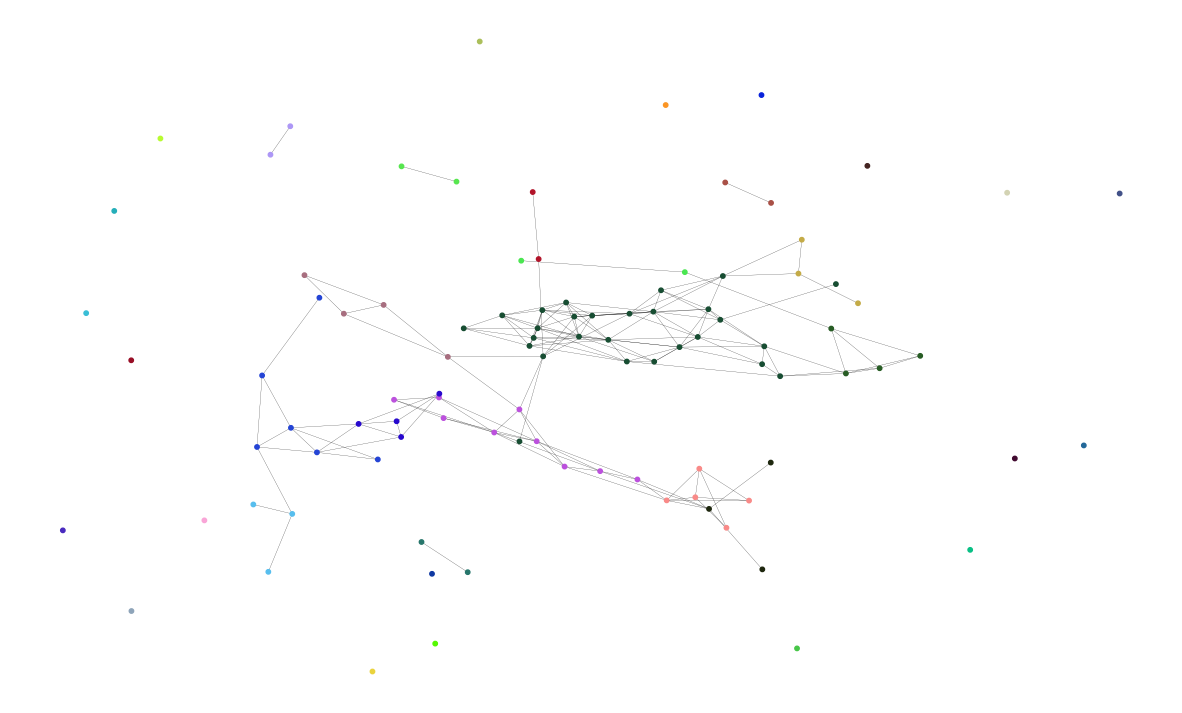

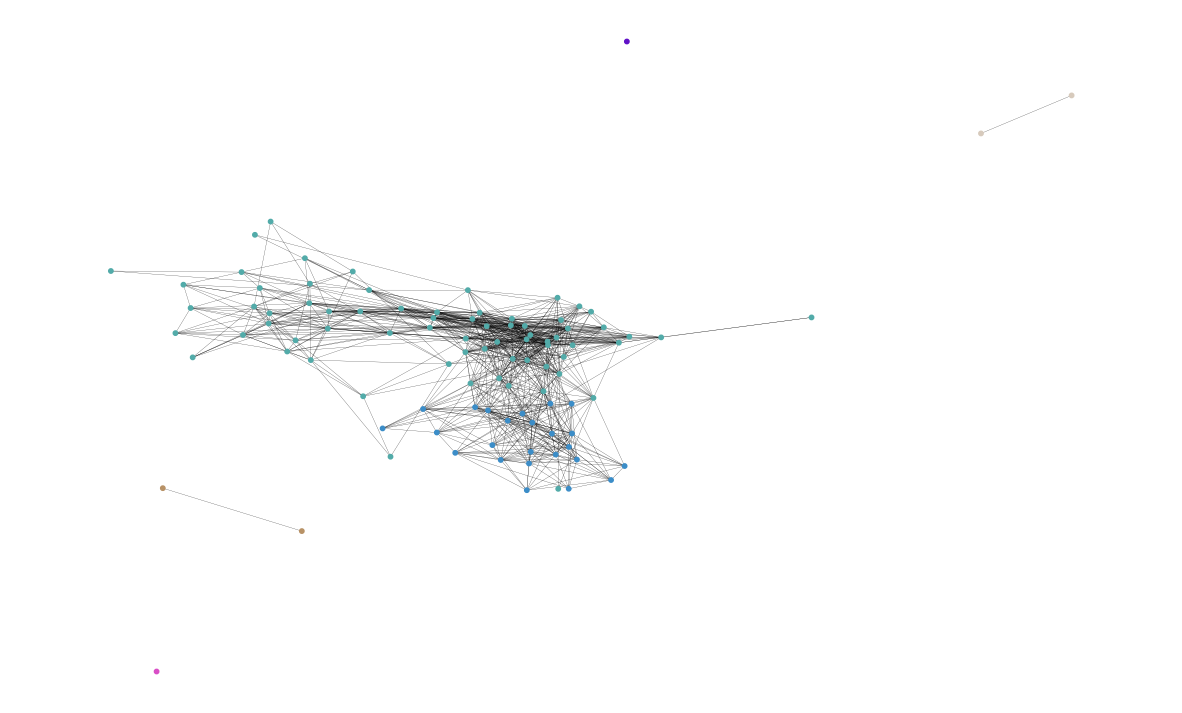

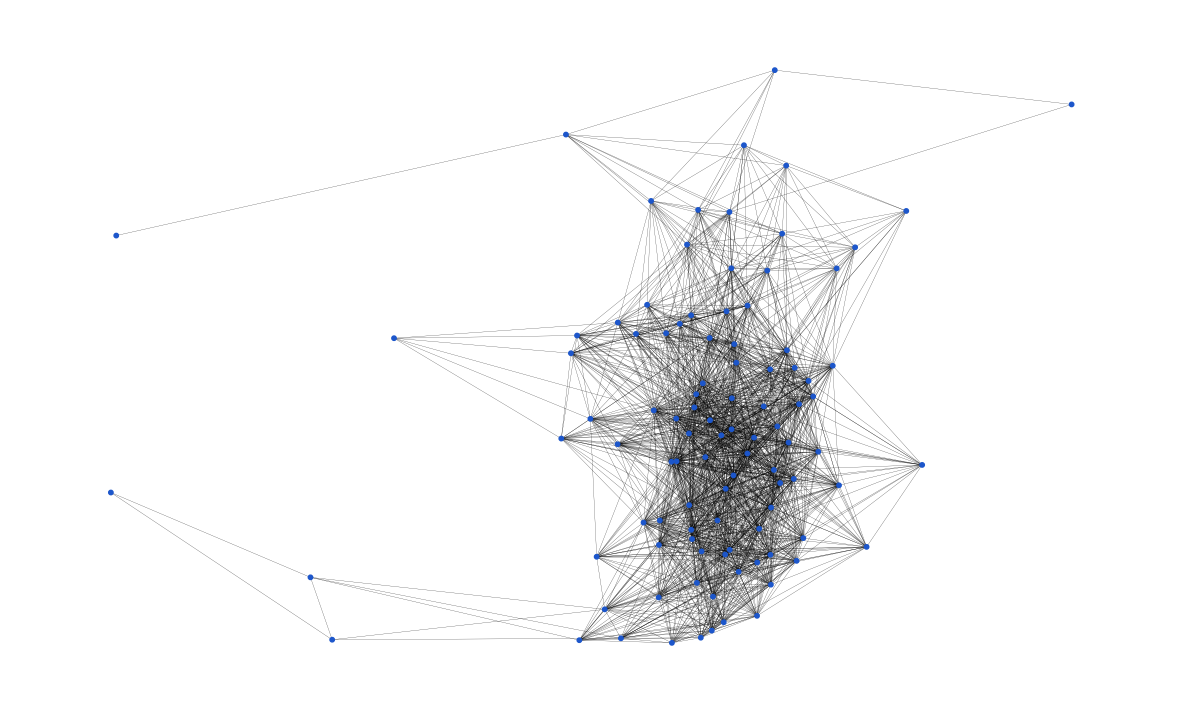

In [30]:
# Etude des communautés à l'instant 0
# Utilisation de la méthode de propagation d'étiquettes semi-synchrone (semi-synchronous label propagation) pour calculer les communautés
def calcul_communautes(g):
    colors = ["" for x in range(g.number_of_nodes())]  # initialize colors list
    counter = 0
    for com in nx.community.label_propagation_communities(g):
        color = "#%06X" % randint(0, 0xFFFFFF)  # creates random RGB color
        counter += 1
        for node in list(
            com
        ):  # fill colors list with the particular color for the community nodes
            colors[node] = color
    print("Nombre de communautés : ", counter)

    plt.figure(figsize=(15, 9))
    plt.axis("off")
    pos = nx.spring_layout(g, iterations=15, seed=1721)
    nx.draw_networkx(
        g, pos=pos, node_size=10, with_labels=False, width=0.15, node_color=colors
    )

calcul_communautes(graph1)
calcul_communautes(graph2)
calcul_communautes(graph3)

In [31]:
# Evolution du nombre de communautés dans le temps
df_nb_communities = pd.DataFrame({
    "nb_communities20": [len(nx.community.label_propagation_communities(g)) for g in graphs20],
    "nb_communities40": [len(nx.community.label_propagation_communities(g)) for g in graphs40],
    "nb_communities60": [len(nx.community.label_propagation_communities(g)) for g in graphs60]
})

display(df_nb_communities)

nb_communities20  nb_communities40  nb_communities60
0                   36                 6                 1
1                   36                 7                 1
2                   37                 6                 1
3                   38                 6                 1
4                   39                 6                 1
...                ...               ...               ...
9995                49                12                 3
9996                49                11                 3
9997                49                11                 3
9998                49                11                 3
9999                49                11                 3

[10000 rows x 3 columns]

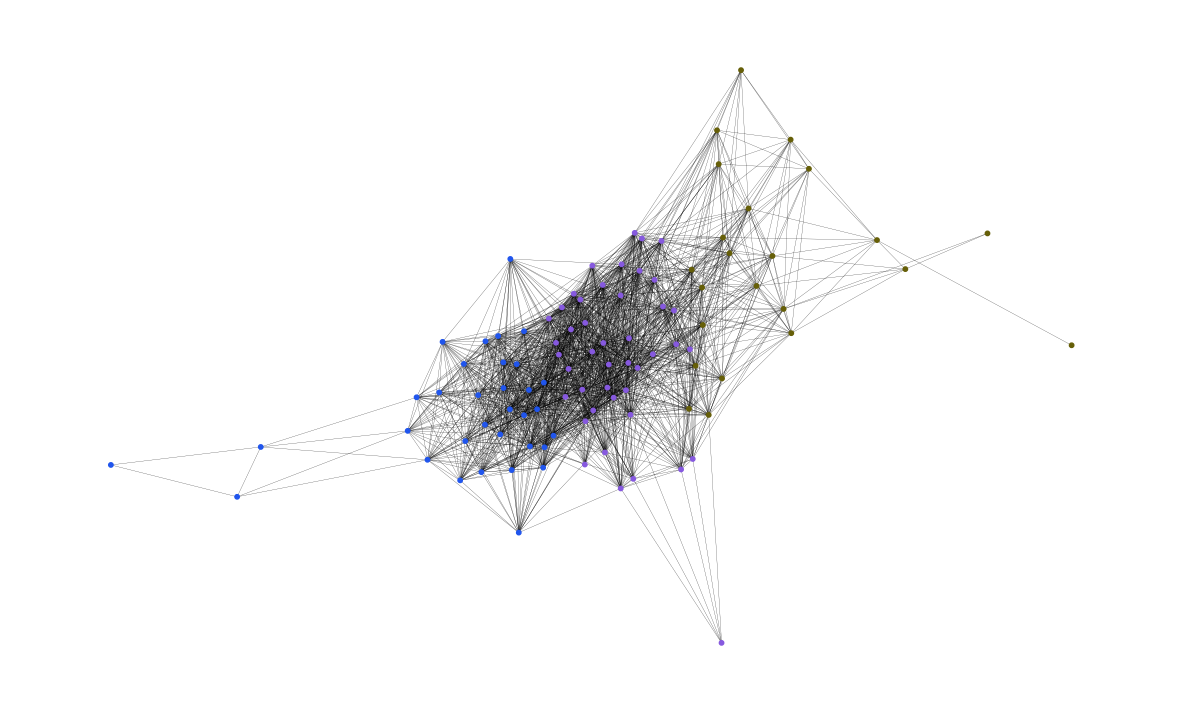

In [32]:
colors = ["" for x in range(graph3.number_of_nodes())]
for com in nx.community.asyn_fluidc(graph3, 3, seed=0):
    color = "#%06X" % randint(0, 0xFFFFFF)  # creates random RGB color
    for node in list(com):
        colors[node] = color

pos = nx.spring_layout(graph3)
plt.figure(figsize=(15, 9))
plt.axis("off")
nx.draw_networkx(
    graph3, pos=pos, node_size=10, with_labels=False, width=0.15, node_color=colors
)

## Mesure de la centralité

### Degré de centralité

In [33]:
def degre_centralite(graph) :
    degree_centrality = nx.centrality.degree_centrality(graph)  # save results in a variable to use again
    (sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

    return degree_centrality

degree_centrality_1 = degre_centralite(graph1)
degree_centrality_2 = degre_centralite(graph2)
degree_centrality_3 = degre_centralite(graph3)

In [34]:
(sorted(graph1.degree, key=lambda item: item[1], reverse=True))[:8]

[(42, 11), (71, 11), (78, 11), (11, 10), (9, 9), (17, 9), (33, 9), (50, 9)]

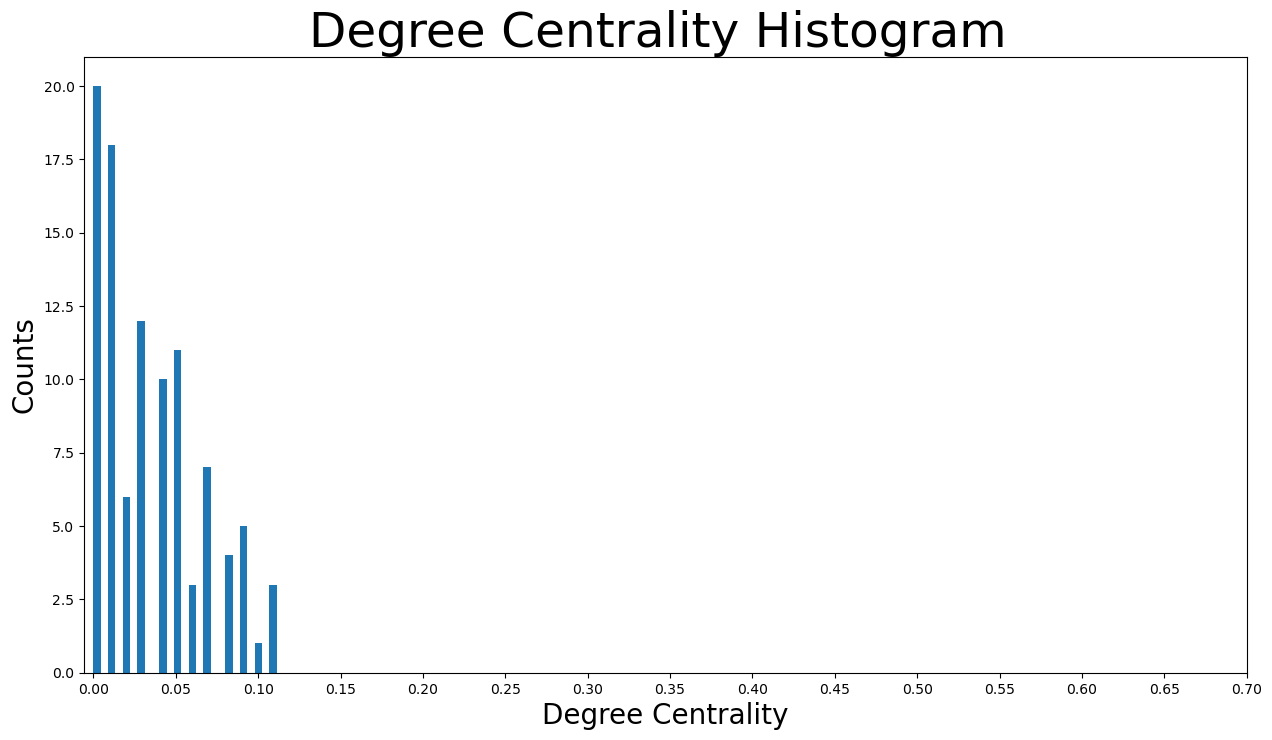

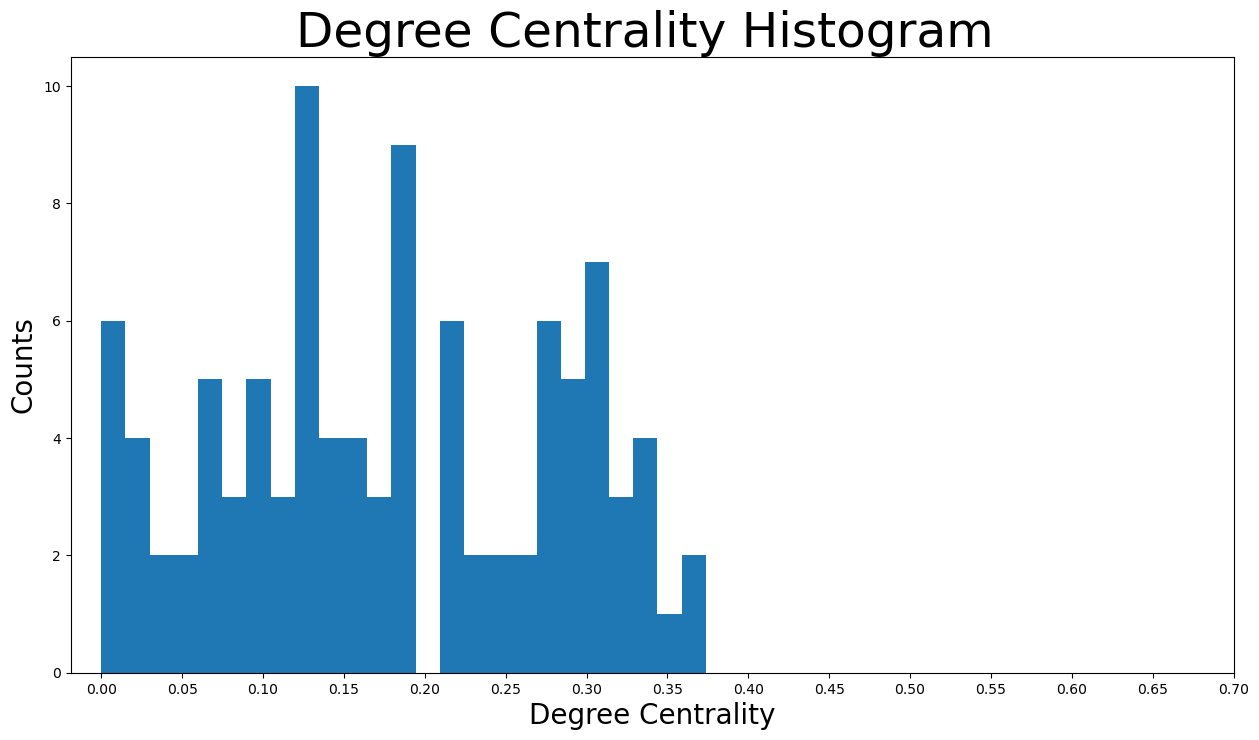

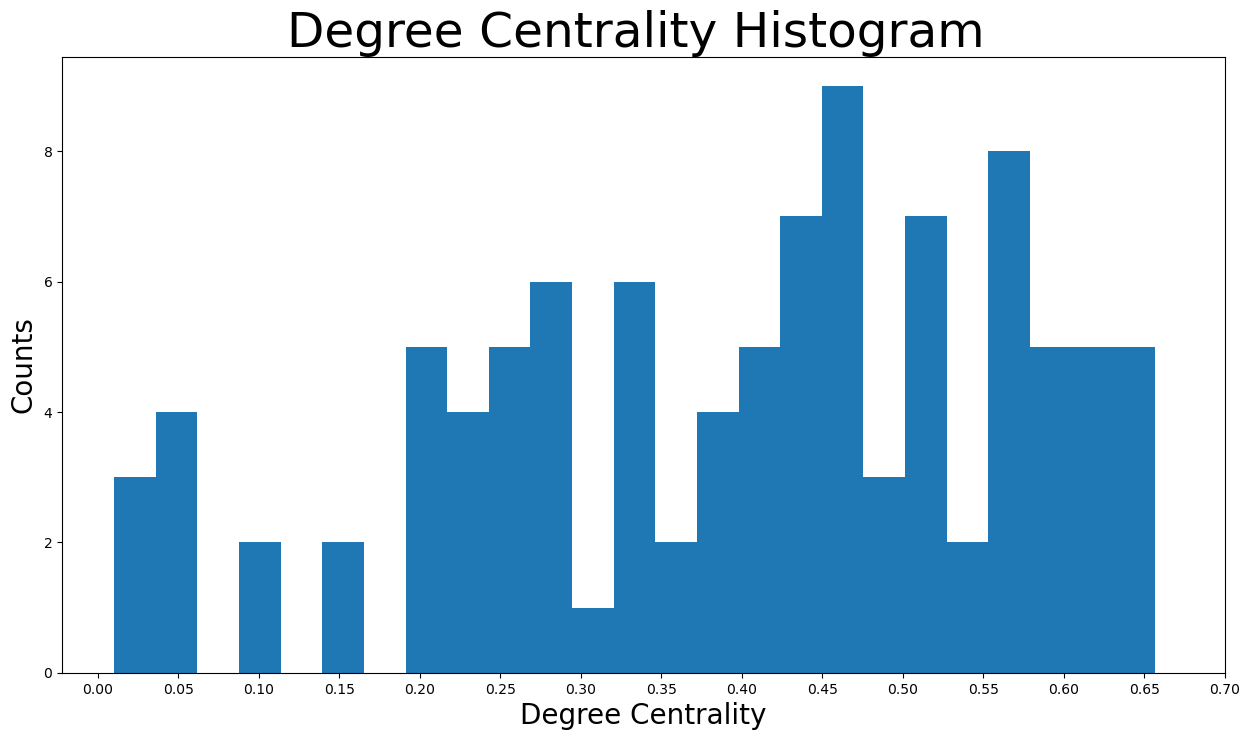

In [35]:
def hist_centralite(degree_centrality) :
    plt.figure(figsize=(15, 8))
    plt.hist(degree_centrality.values(), bins=25)
    plt.xticks(ticks=[0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7])
    plt.title("Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
    plt.xlabel("Degree Centrality", fontdict={"size": 20})
    plt.ylabel("Counts", fontdict={"size": 20})

hist_centralite(degree_centrality_1)
hist_centralite(degree_centrality_2)
hist_centralite(degree_centrality_3)

On constate que le degré de centralité est très faible pour le graphe 1. Cela semble normal, car la portée étant faible, le nombre de voisins de chaque satellite est faible. On constate une forte augmentation de la centralité pour le graphe 2, et encore pour le graphe 3, ce qui signifie qu'avec une meilleure portée les satellites peuvent communiquer avec des satellites plus éloignés et ont donc plus de voisins.

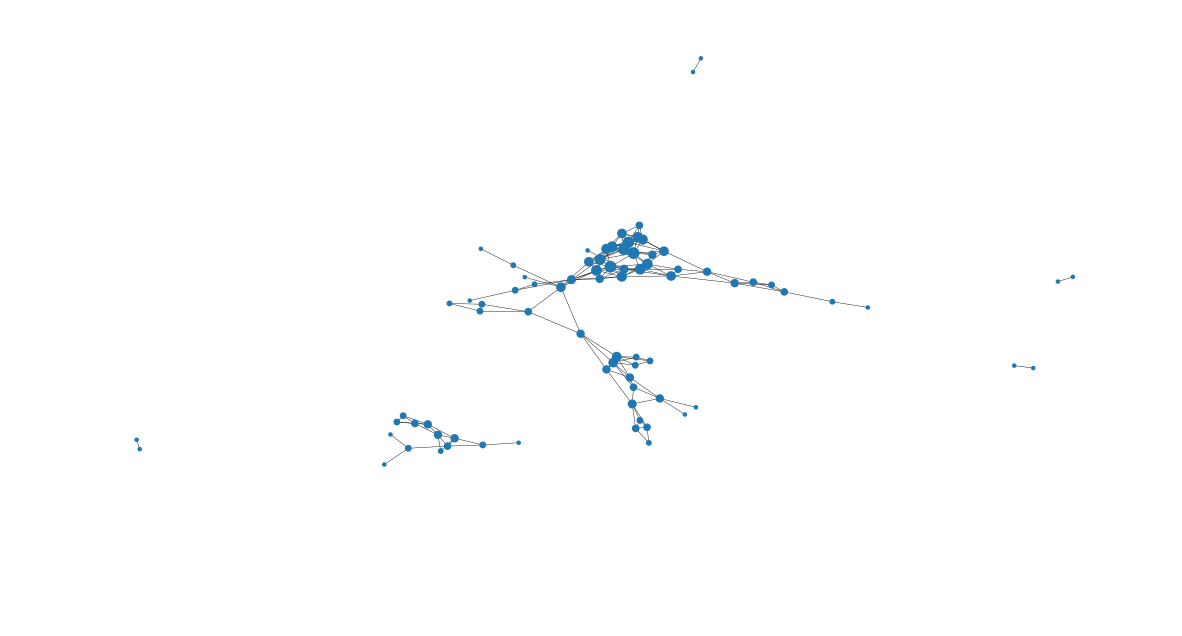

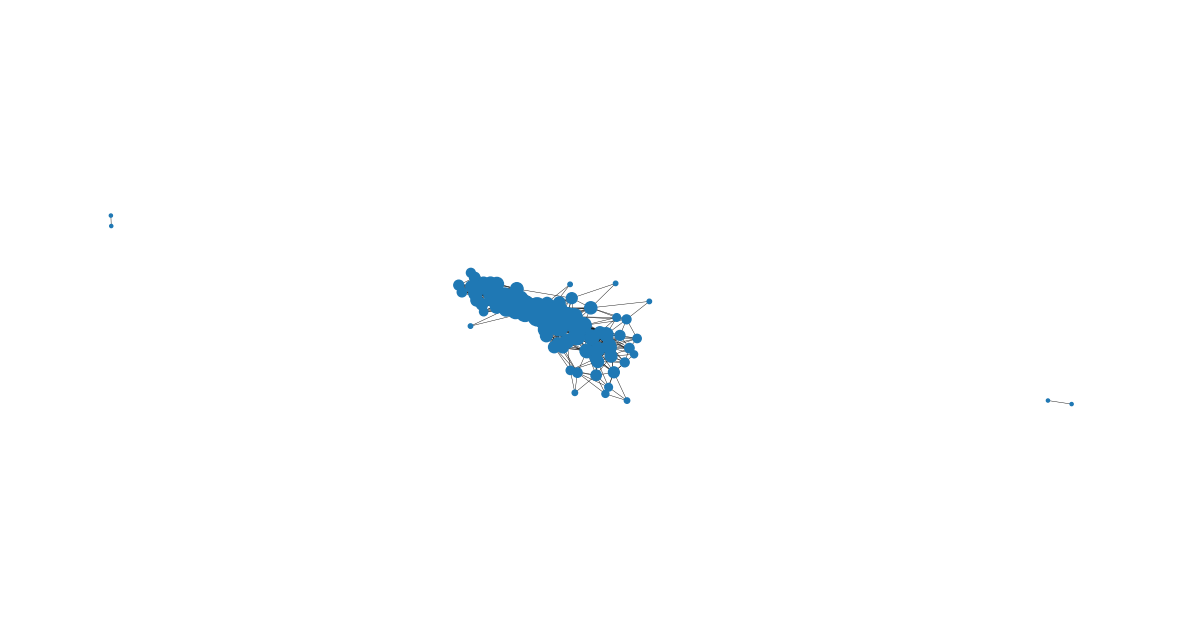

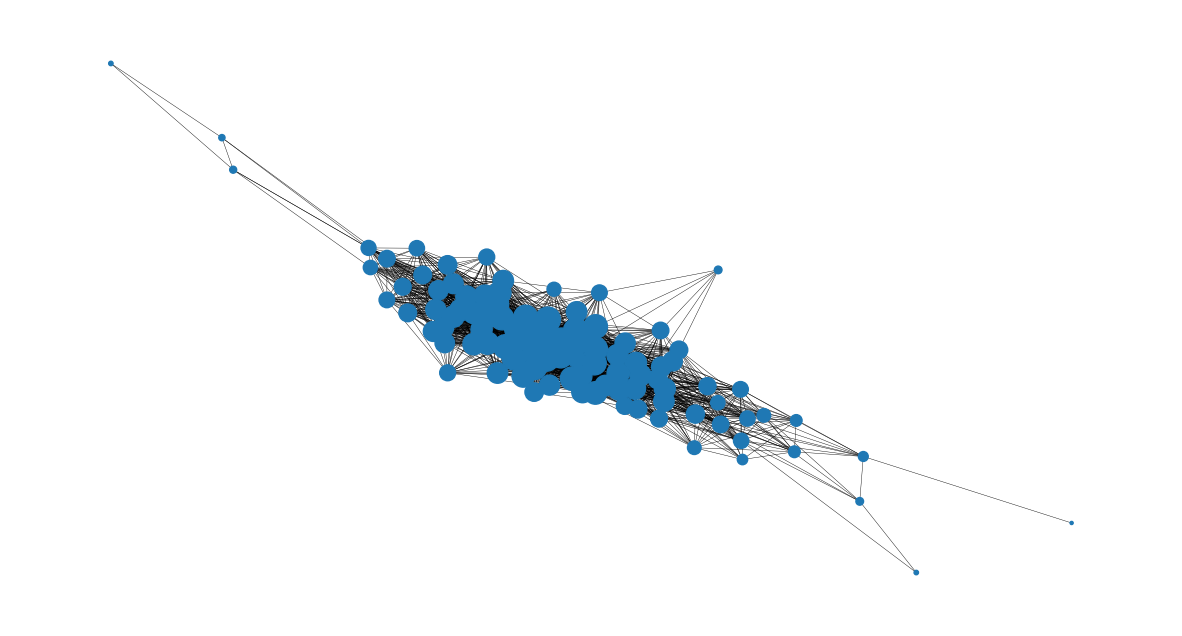

In [36]:
def graph_centralite(degree_centrality, graph) :
    node_size = [
        v * 500 for v in degree_centrality.values()
    ]  # set up nodes size for a nice graph representation
    plt.figure(figsize=(15, 8))
    nx.draw_networkx(graph, pos=nx.spring_layout(graph), node_size=node_size, with_labels=False, width=0.3)
    plt.axis("off")

graph_centralite(degree_centrality_1, graph1)
graph_centralite(degree_centrality_2, graph2)
graph_centralite(degree_centrality_3, graph3)

### Intermédiarité

In [37]:
def betweenness_centrality(graph) :
    return nx.centrality.betweenness_centrality(graph)  # save results in a variable to use again

betweenness_centrality_1 = betweenness_centrality(graph1)
betweenness_centrality_2 = betweenness_centrality(graph2)
betweenness_centrality_3 = betweenness_centrality(graph3)

(sorted(betweenness_centrality_1.items(), key=lambda item: item[1], reverse=True))[:8]
(sorted(betweenness_centrality_2.items(), key=lambda item: item[1], reverse=True))[:8]
(sorted(betweenness_centrality_3.items(), key=lambda item: item[1], reverse=True))[:8]

[(26, 0.030339610795905338),
 (16, 0.028727181477794708),
 (80, 0.021561789479210933),
 (97, 0.02124388929452059),
 (27, 0.021229605911716524),
 (33, 0.020489546754543522),
 (88, 0.020462673557070942),
 (87, 0.019821767978849478)]

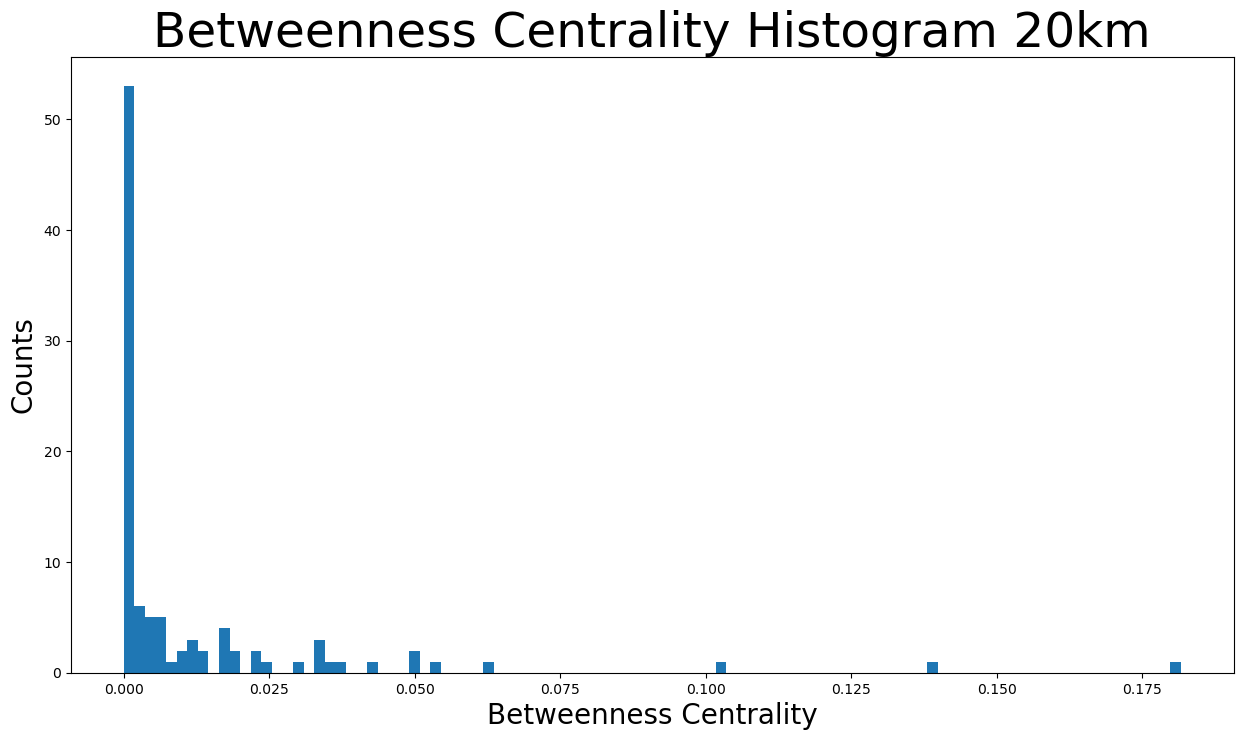

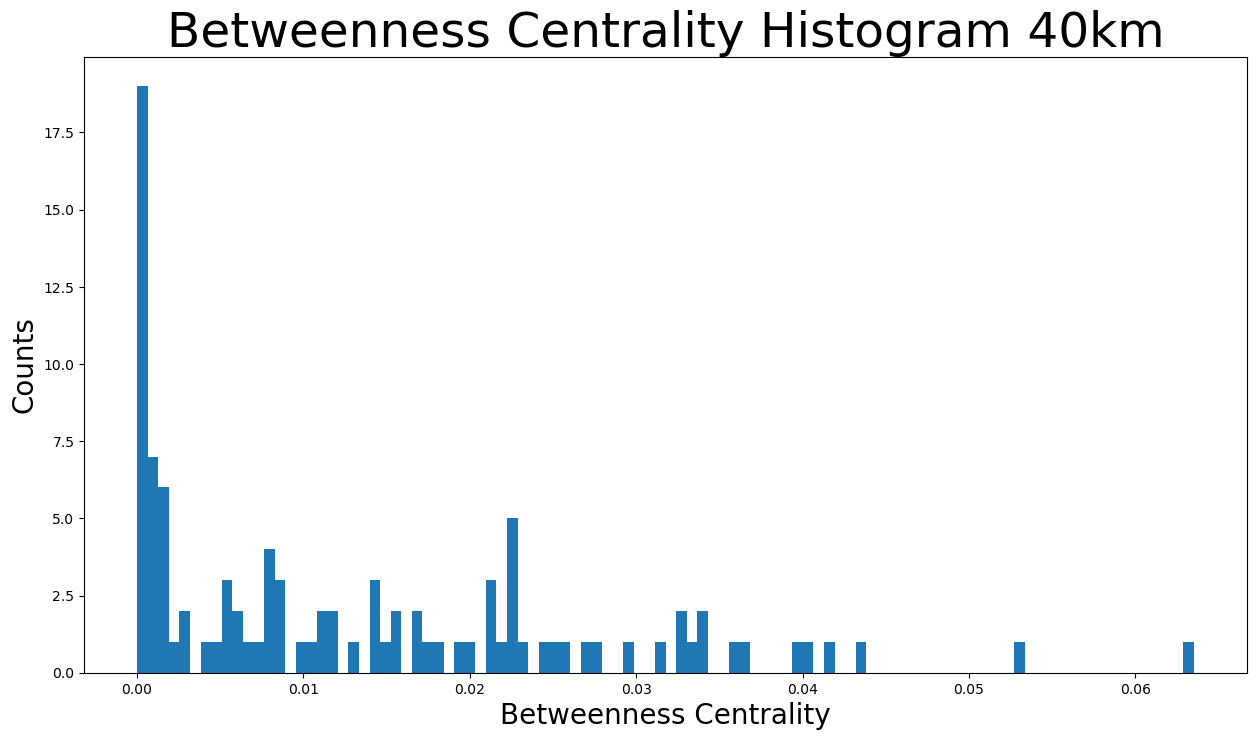

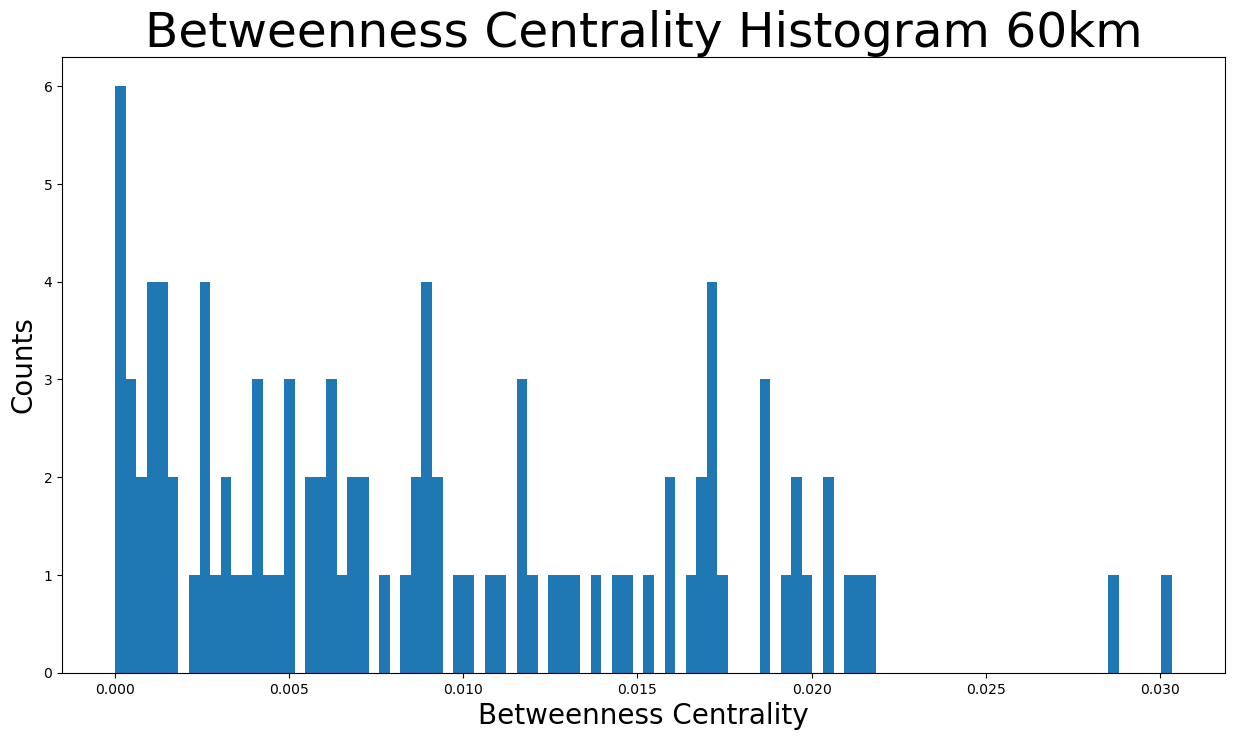

In [38]:
def hist_betweenness_centrality(bet_centrality, distance) :
    plt.figure(figsize=(15, 8))
    plt.hist(bet_centrality.values(), bins=100)
    plt.title("Betweenness Centrality Histogram " + distance, fontdict={"size": 35}, loc="center")
    plt.xlabel("Betweenness Centrality", fontdict={"size": 20})
    plt.ylabel("Counts", fontdict={"size": 20})

hist_betweenness_centrality(betweenness_centrality_1, "20km")
hist_betweenness_centrality(betweenness_centrality_2, "40km")
hist_betweenness_centrality(betweenness_centrality_3, "60km")

Sur le 1er graphe, on constate que beaucoup de noeuds ont leur centralité à 0 car ils ne sont impliqués dans aucun plus court chemin. En effet il y a peu de plus courts chemins, le graphe étant déconnecté.\
Sur le graphe 2, les noeuds sont plus liés mais les plus courts chemins sont longs car les noeuds restent peu connectés. De fait, le ratio entre la somme des plus courts chemins et le nombre de noeuds - 1 peut être plus important que dans le graphe 3.\
Dans le graphe 3, on constate que la centralité est plus basse mais mieux répartie entre les noeuds. En effet, les satellites sont très connectés donc les plus courts chemins sont plus courts et les satellites sont impliqués dans moins de plus courts chemins, le ratio est donc plus bas.

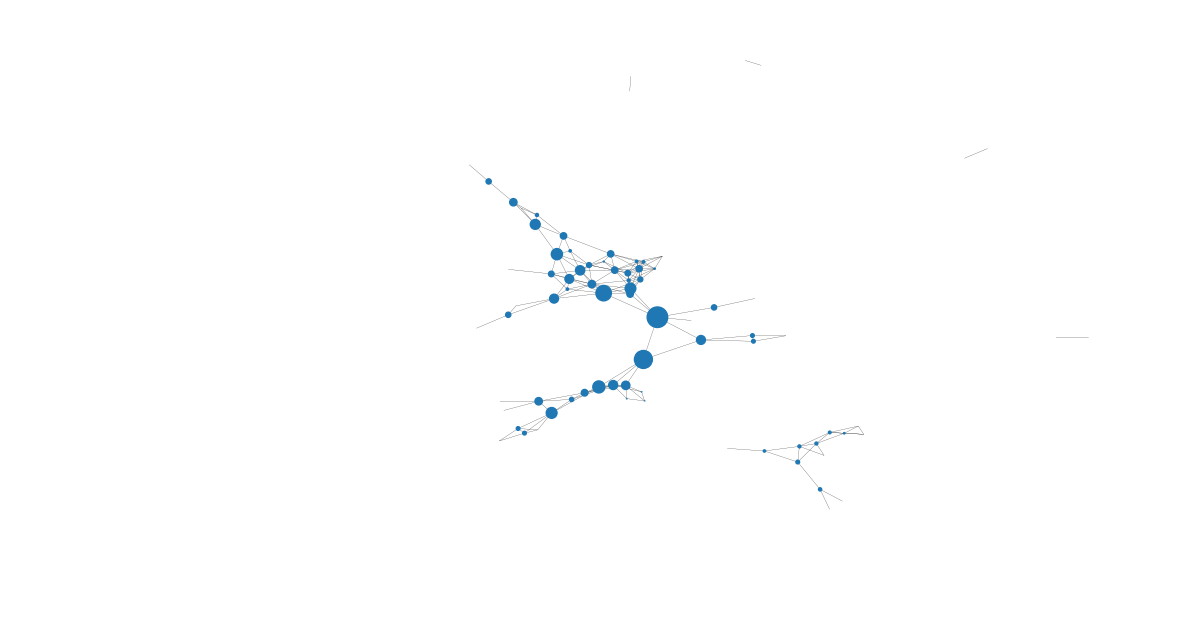

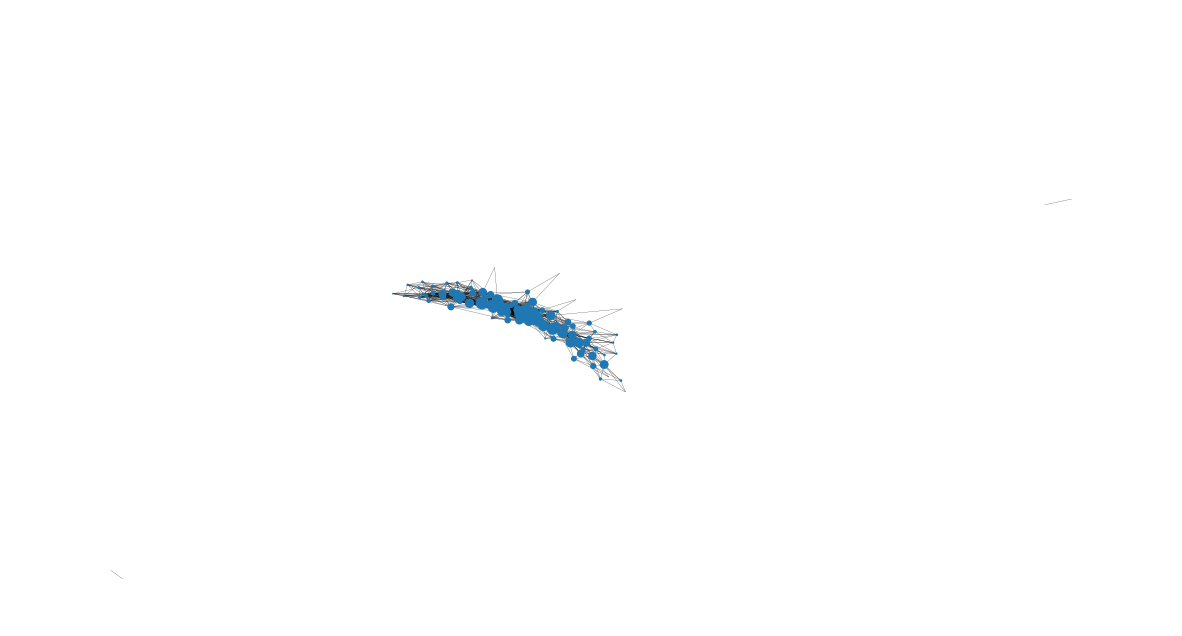

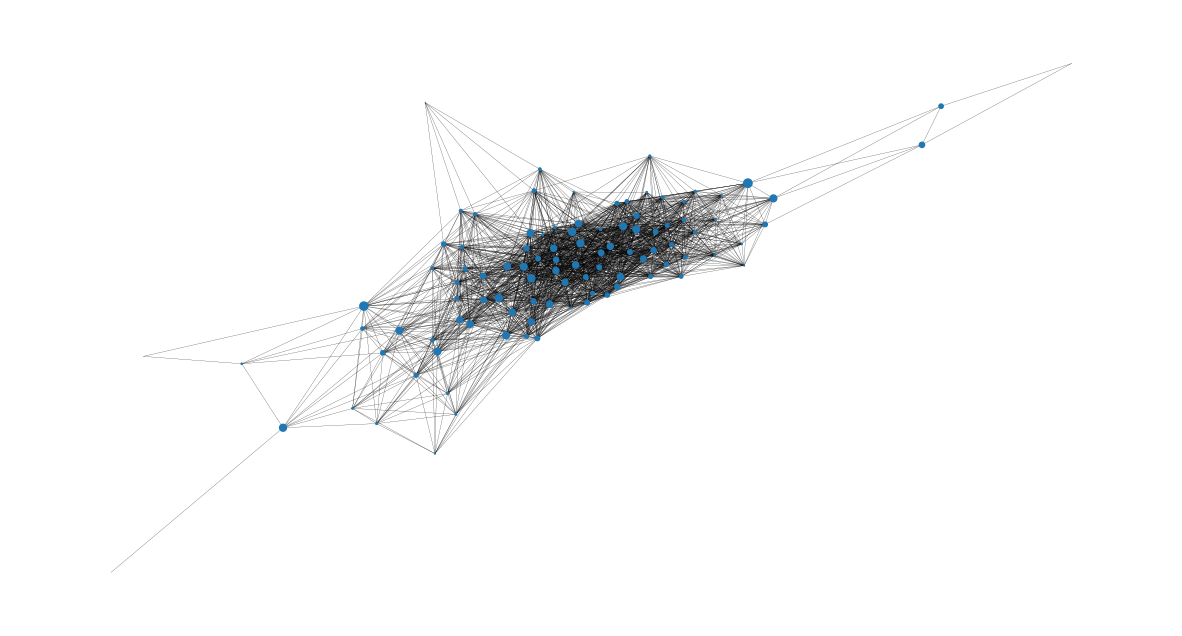

In [39]:
def graph_betweenness_centrality(betweenness_centrality, graph) :
    node_size = [
        v * 1200 for v in betweenness_centrality.values()
    ]  # set up nodes size for a nice graph representation
    plt.figure(figsize=(15, 8))
    nx.draw_networkx(graph, pos=nx.spring_layout(graph), node_size=node_size, with_labels=False, width=0.15)
    plt.axis("off")

graph_betweenness_centrality(betweenness_centrality_1, graph1)
graph_betweenness_centrality(betweenness_centrality_2, graph2)
graph_betweenness_centrality(betweenness_centrality_3, graph3)

### Centralité de proximité

In [40]:
def closeness_centrality(graph) :
    return nx.centrality.closeness_centrality(graph)  # save results in a variable to use again

closeness_centrality_1 = closeness_centrality(graph1)
closeness_centrality_2 = closeness_centrality(graph2)
closeness_centrality_3 = closeness_centrality(graph3)

(sorted(closeness_centrality_1.items(), key=lambda item: item[1], reverse=True))[:8]
(sorted(closeness_centrality_2.items(), key=lambda item: item[1], reverse=True))[:8]
(sorted(closeness_centrality_3.items(), key=lambda item: item[1], reverse=True))[:8]

[(33, 0.6923076923076923),
 (17, 0.6875),
 (71, 0.6875),
 (78, 0.6875),
 (27, 0.6827586206896552),
 (97, 0.6827586206896552),
 (5, 0.678082191780822),
 (84, 0.678082191780822)]

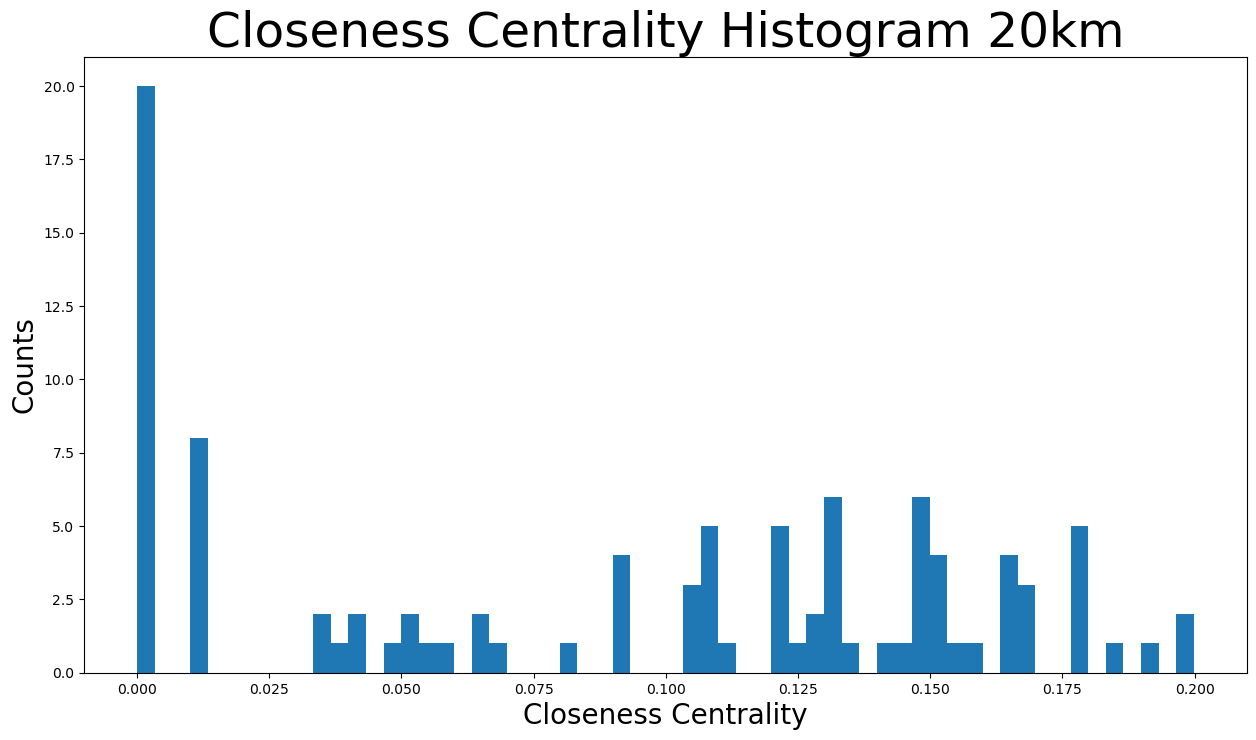

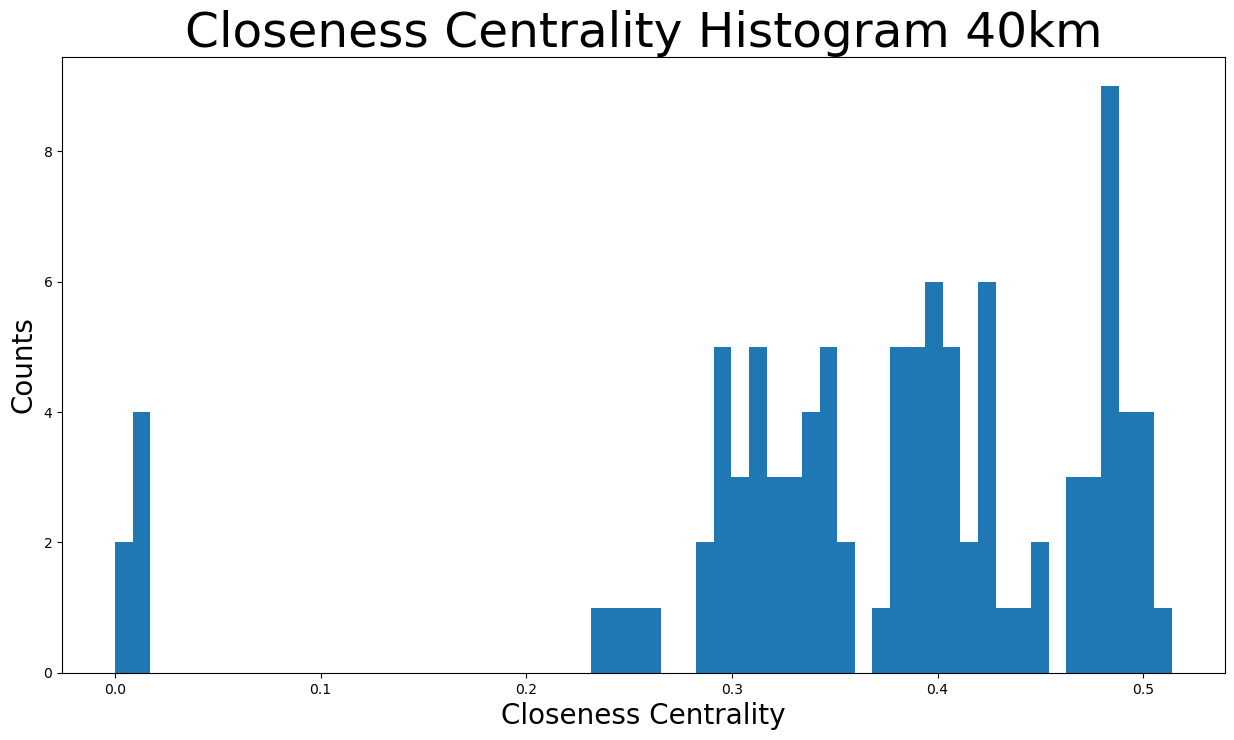

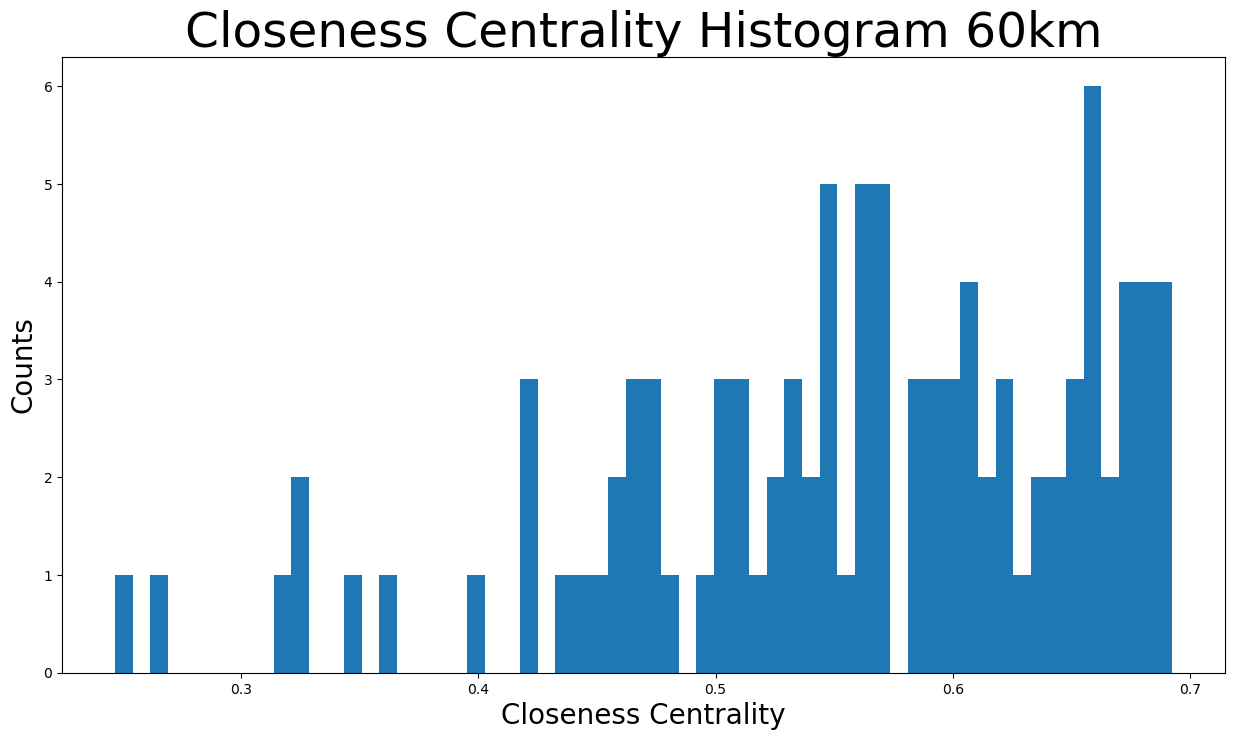

In [41]:
def hist_closeness_centrality(closeness_centrality, distance) :
    plt.figure(figsize=(15, 8))
    plt.hist(closeness_centrality.values(), bins=60)
    plt.title("Closeness Centrality Histogram " + distance, fontdict={"size": 35}, loc="center")
    plt.xlabel("Closeness Centrality", fontdict={"size": 20})
    plt.ylabel("Counts", fontdict={"size": 20})

hist_closeness_centrality(closeness_centrality_1, "20km")
hist_closeness_centrality(closeness_centrality_2, "40km")
hist_closeness_centrality(closeness_centrality_3, "60km")

On constate que pour le graphe 1, beaucoup de satellites sont éloignés du centre du réseau et sont donc difficilement atteignables (ils ont leur centralité à 0). Plus leur portée augmente (graphes 2 puis 3), plus leur centralité augmente. Cela signifie qu'il y a plus de noeuds proches du centre du réseau, ce qui améliore la rapidité des communications entre les satellites.

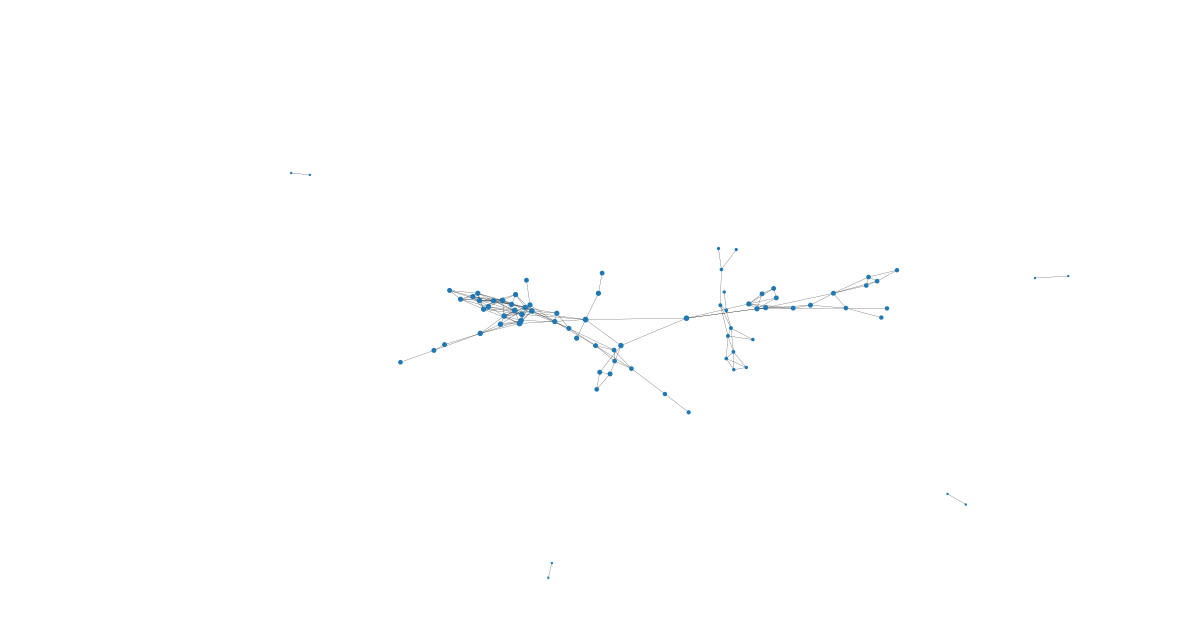

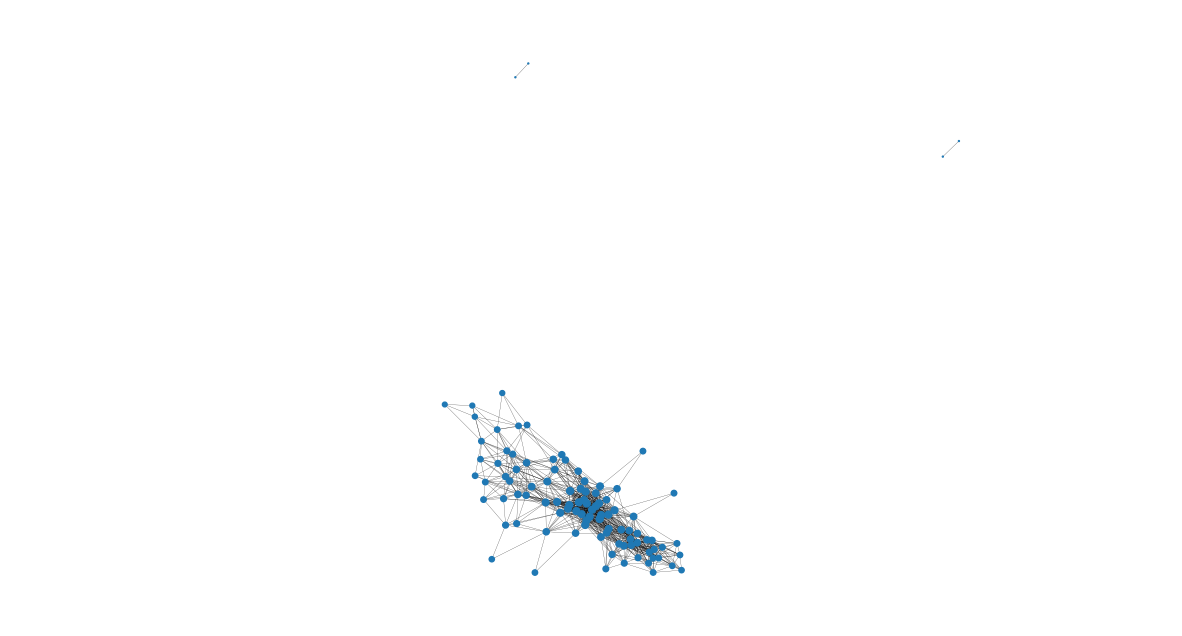

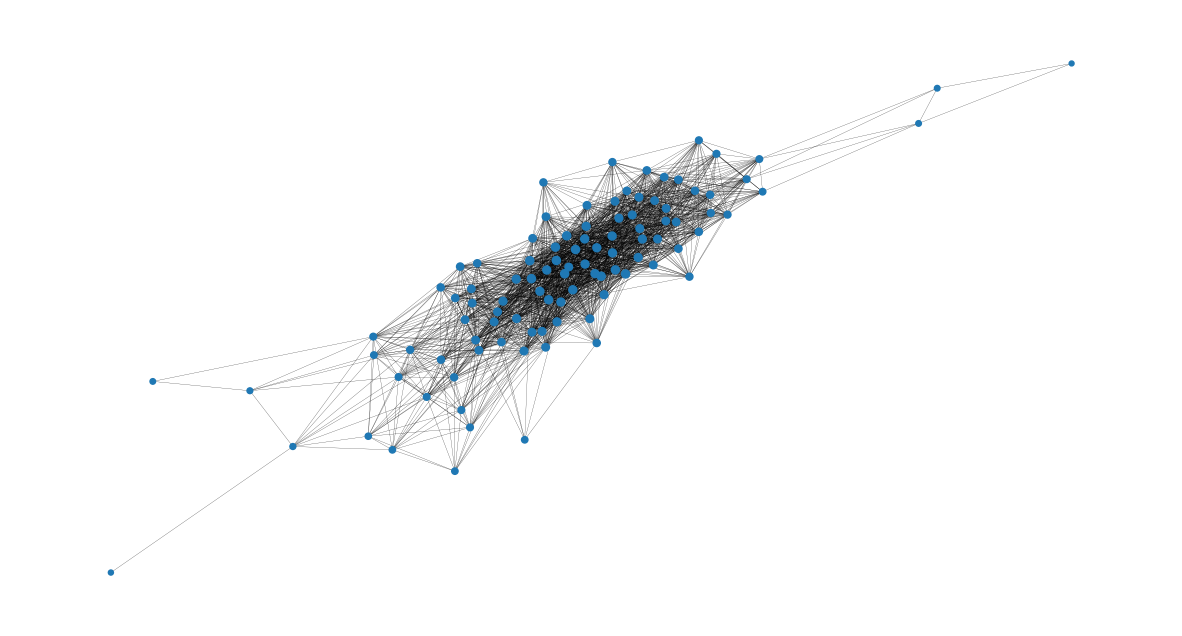

In [42]:
def graph_closeness_centrality(graph, closeness_centrality) :
    node_size = [
        v * 50 for v in closeness_centrality.values()
    ]  # set up nodes size for a nice graph representation
    plt.figure(figsize=(15, 8))
    nx.draw_networkx(graph, pos=nx.spring_layout(graph), node_size=node_size, with_labels=False, width=0.15)
    plt.axis("off")

graph_closeness_centrality(graph1, closeness_centrality_1)
graph_closeness_centrality(graph2, closeness_centrality_2)
graph_closeness_centrality(graph3, closeness_centrality_3)

### Centralité du vecteur propre

In [43]:
def eigenvector_centrality(graph) :
    return nx.centrality.eigenvector_centrality(graph)  # save results in a variable to use again

eigenvector_centrality_1 = eigenvector_centrality(graph1)
eigenvector_centrality_2 = eigenvector_centrality(graph2)
eigenvector_centrality_3 = eigenvector_centrality(graph3)

(sorted(eigenvector_centrality_1.items(), key=lambda item: item[1], reverse=True))[:10]
(sorted(eigenvector_centrality_2.items(), key=lambda item: item[1], reverse=True))[:10]
(sorted(eigenvector_centrality_3.items(), key=lambda item: item[1], reverse=True))[:10]

[(33, 0.15668648427226306),
 (17, 0.15436493218601416),
 (27, 0.1531072598241311),
 (78, 0.15236419536554566),
 (71, 0.15176419036913055),
 (90, 0.15036046124935204),
 (42, 0.15010786235373136),
 (84, 0.14967250215426306),
 (70, 0.14920292273577207),
 (50, 0.14739497401636614)]

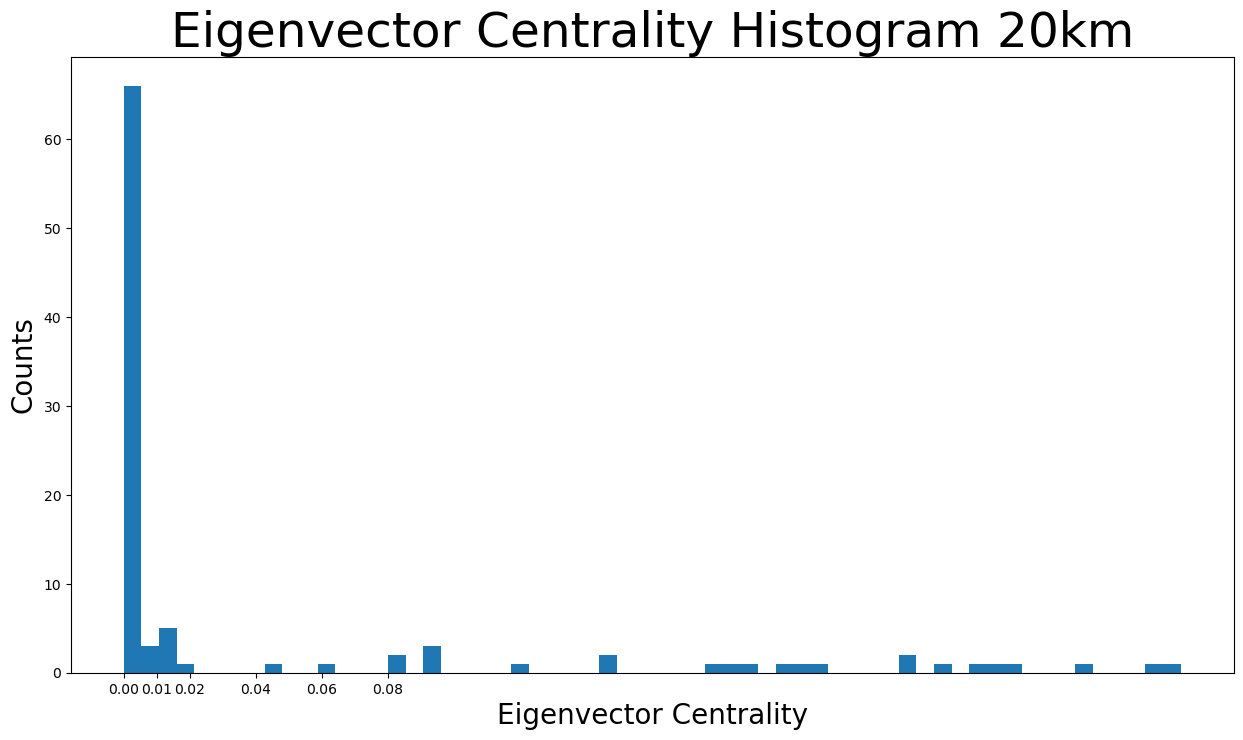

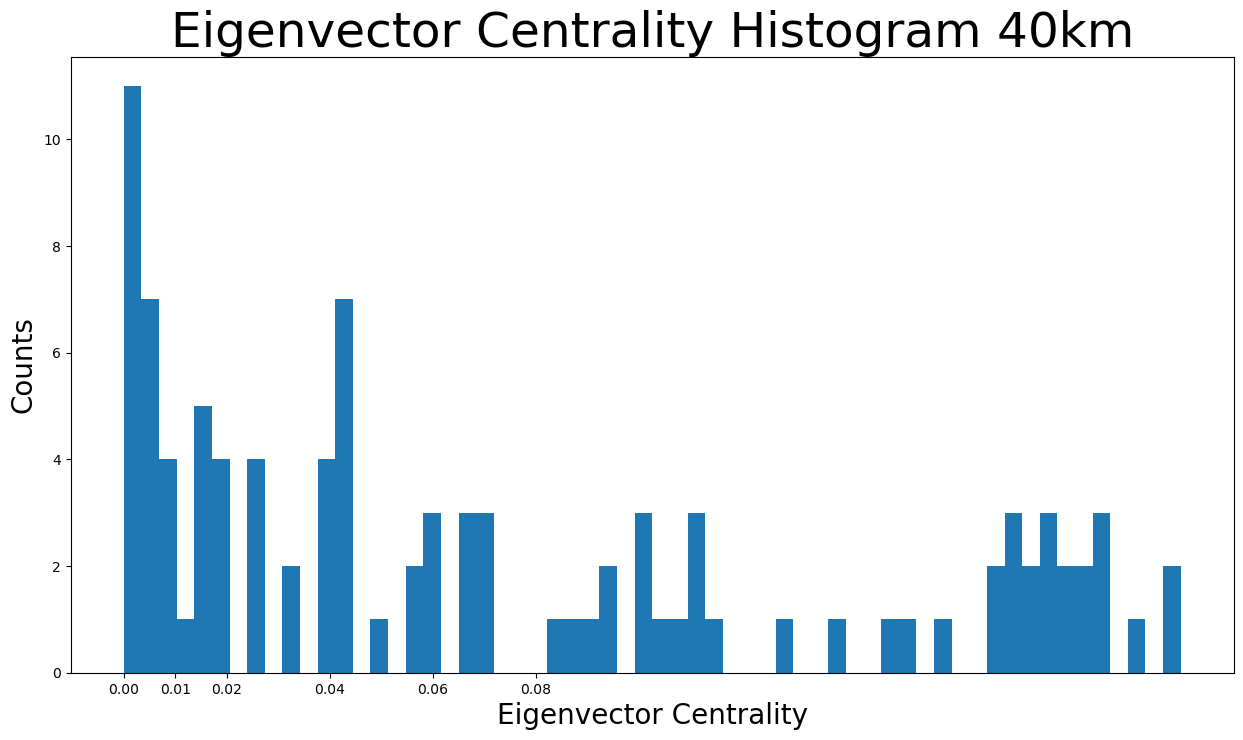

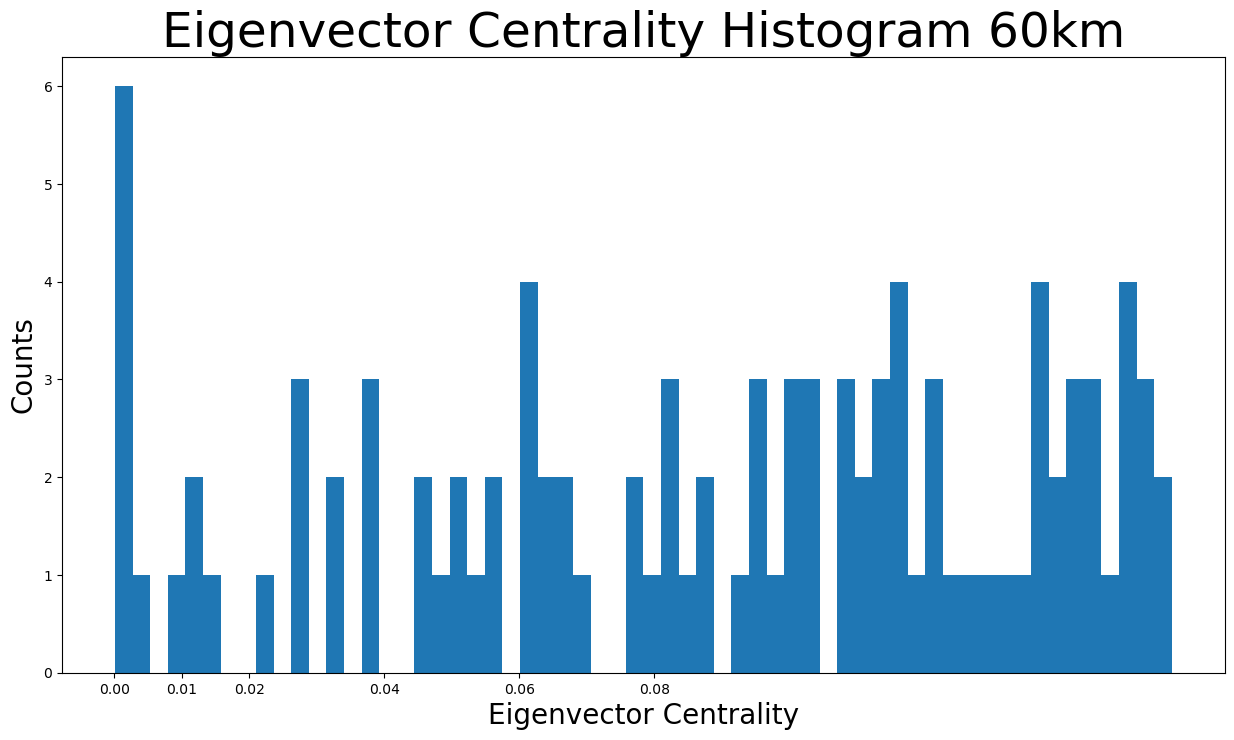

In [44]:
def hist_eigenvector_centrality(eigenvector_centrality, name) :
    plt.figure(figsize=(15, 8))
    plt.hist(eigenvector_centrality.values(), bins=60)
    plt.xticks(ticks=[0, 0.01, 0.02, 0.04, 0.06, 0.08])  # set the x axis ticks
    plt.title("Eigenvector Centrality Histogram " + name, fontdict={"size": 35}, loc="center")
    plt.xlabel("Eigenvector Centrality", fontdict={"size": 20})
    plt.ylabel("Counts", fontdict={"size": 20})

hist_eigenvector_centrality(eigenvector_centrality_1, "20km")
hist_eigenvector_centrality(eigenvector_centrality_2, "40km")
hist_eigenvector_centrality(eigenvector_centrality_3, "60km")

D'après le graphe 1, on constate qu'il y a peu de satellites "importants" pour une portée de 20km. On définit cette importance par le nombre de noeuds eux-mêmes importants (fortement connectés) connectés à un noeud, ce qui est plus pertinent qu'une centralité basée uniquement sur le nombre de voisins directs. Pour le graphe 2, on constate que la centralité moyenne augmente, et de même pour le graphe 3 où on a un nombre élevés de noeuds importants. On en déduit qu'avec une meilleure portée, le nombre de noeuds stratégiques augmente, ce qui permet aux satellites de former des sous réseaux denses et réactifs.

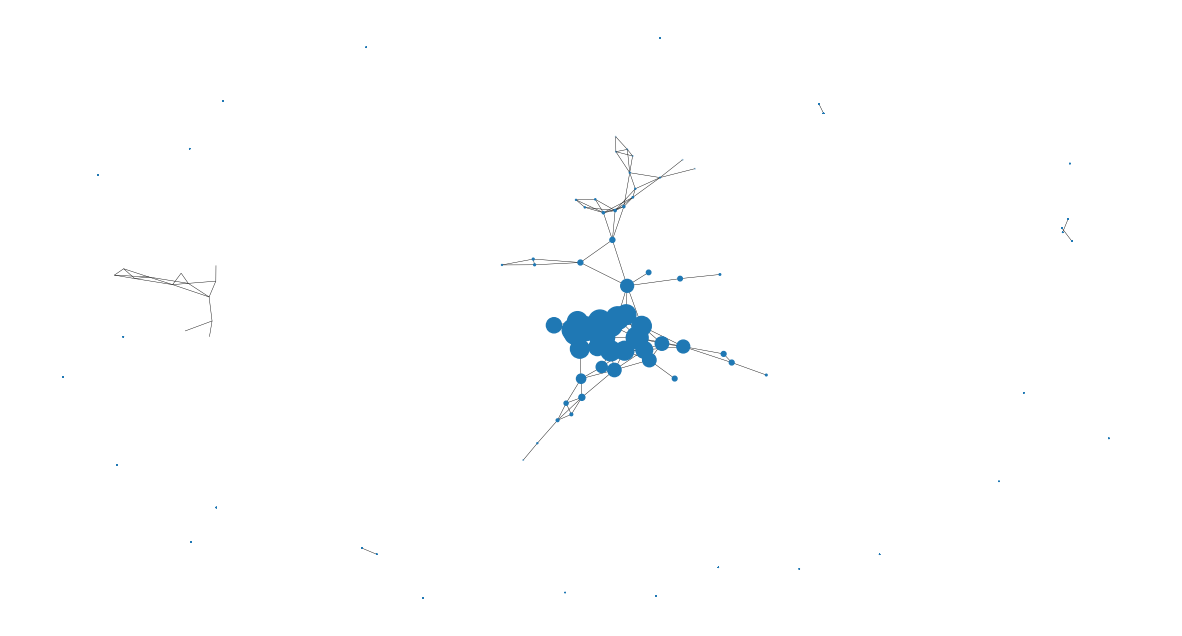

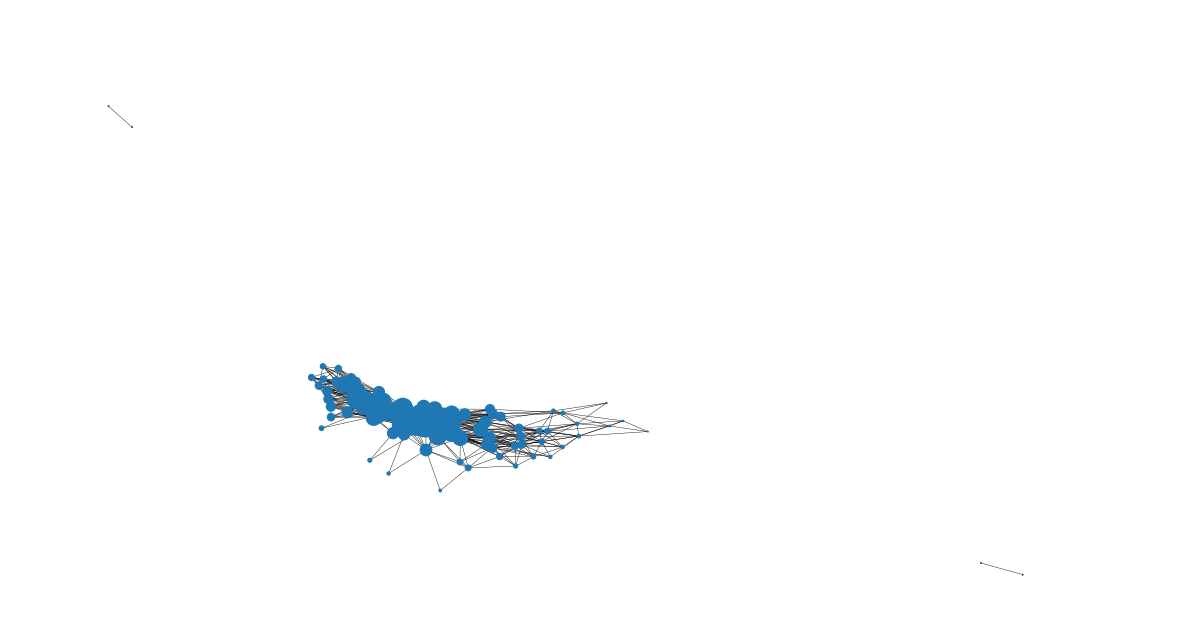

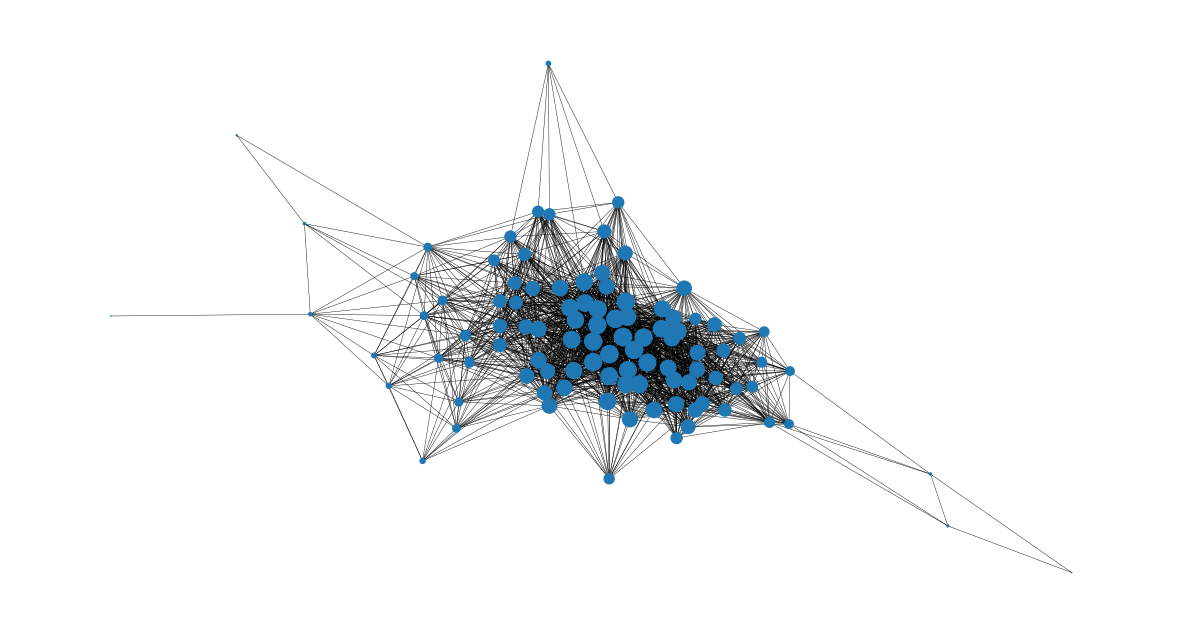

In [45]:
def graph_eigenvector_centrality(graph, eigenvector_centrality) :
    node_size = [
        v * 1000 for v in eigenvector_centrality.values()
    ]  # set up nodes size for a nice graph representation
    plt.figure(figsize=(15, 8))
    nx.draw_networkx(graph, pos=nx.spring_layout(graph), node_size=node_size, with_labels=False, width=0.30)
    plt.axis("off")

graph_eigenvector_centrality(graph1, eigenvector_centrality_1)
graph_eigenvector_centrality(graph2, eigenvector_centrality_2)
graph_eigenvector_centrality(graph3, eigenvector_centrality_3)